In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

pd.set_option('display.max_rows', None) # Show max rows/columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Table of Contents
<a id="top"></a>

1.	[Load Data](#load_data)
2.	[EDA](#eda)
    + 2.1 [Target](#target)
    + 2.2 [Features](#features)
        + 2.2.1 [Categorical Features](#cat_feat)
        + 2.2.2 [Numeric Features](#num_feat)
3.	[Code Test](#test)
4.  [OVR](#ovr)
    + 4.1 [Test a model](#test1)

# 1. Load Data
<a id="load_data"></a>
<a href="#top">Back to top</a>

In [3]:
X = pd.read_csv('../input/train_features.csv')
print(X.shape)
X.head()

(23814, 876)


sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5     g-6     g-7     g-8     g-9    g-10    g-11    g-12  \
0 -0.1944 -1.0120 -1.0220 -0.0326  0.5548 -0.0921  1.1830  0.1530  0.5574   
1  1.0190  0.5207  0.2341  0.3372 -0.4047  0.8507 -1.1520 -0.4201 -0.0958   
2 -0.0323  1.2390  0.1715  0.2155  0.0065  1.2300 -0.4797 -0.5631 -0.0366   
3  4.0620 -0.8095 -1.9590  0.1792 -0.1321 -1.0600 -0.8269 -0.3584 -0.8511   
4  1.4180 -0.8244 -0.2800 -0.1498 -0.8789  0.8630 -0.2219 -0.5121 -0.9577   

     g-13    g-14    g-15    g-16    g-17    g-18    g-19    g-20    g-21  \
0 -0.4015  0.1789 -0.6528 -0.7969  0.6342  0.1778 -0.3694 -0.5688 -1.1360   
1  0.4590  0.0803  0.2250  0.5293  0.2839 -0.3494  0.2883  0.9449 -0.1646   
2 -1.8300  0.6057 -0.3278  0.6042 -0.3075 -0.1147 -0.0570 -0.0799 -0.8181   
3 -0.5844 -2.5690  0.8183 -0.0532 -0.8554  0.1160 -2.3520  2.1200 -1.1580   
4  1.1750  0.2042  0.1970  0.1244 -1.7090 -0.3543 -0.5160 -0.3330 -0.2685   

     g-22    g-23    g-24    g-25    g-26    g-27    g-28    g-29    g-30  \
0 -1.1880  0.6940  0.4393  0.2664  0.1907  0.1628 -0.2853  0.5819  0.2934   
1 -0.2657 -0.3372  0.3135 -0.4316  0.4773  0.2075 -0.4216 -0.1161 -0.0499   
2 -1.5320  0.2307  0.4901  0.4780 -1.3970  4.6240 -0.0437  1.2870 -1.8530   
3 -0.7191 -0.8004 -1.4670 -0.0107 -0.8995  0.2406 -0.2479 -1.0890 -0.7575   
4  0.7649  0.2057  1.3720  0.6835  0.8056 -0.3754 -1.2090  0.2965 -0.0712   

     g-31    g-32    g-33    g-34    g-35    g-36    g-37    g-38    g-39  \
0 -0.5584 -0.0916 -0.3010 -0.1537  0.2198  0.2965 -0.5055 -0.5119 -0.2162   
1 -0.2627  0.9959 -0.2483  0.2655 -0.2102  0.1656  0.5300 -0.2568 -0.0455   
2  0.6069  0.4290  0.1783  0.0018 -1.1800  0.1256 -0.1219  5.4470  1.0310   
3  0.0881 -2.7370  0.8745  0.5787 -1.6740 -1.6720 -1.2690  3.0900 -0.3814   
4  0.6389  0.6674 -0.0783  1.1740 -0.7110 -1.4470  1.0620  0.7888 -0.0848   

     g-40    g-41    g-42    g-43    g-44    g-45    g-46    g-47    g-48  \
0 -0.0347 -0.2566 -1.1980  0.3116 -1.0330  0.2208 -0.1143 -0.0251  0.0350   
1  0.1194 -0.3958 -1.1730  0.4509  1.9250  1.1010  0.2648 -0.3615  0.1710   
2  0.3477 -0.5561  0.0357 -0.3636 -0.4653 -0.8346  0.1113 -0.7615 -0.4983   
3 -0.7229 -0.0010  0.1353 -1.6400 -0.7483 -1.0820 -0.1521  0.0747 -0.4851   
4  0.1302  0.1224  0.9584  0.2126  0.6162  1.1570  1.1140 -0.9416 -0.3780   

     g-49    g-50    g-51    g-52    g-53    g-54    g-55    g-56    g-57  \
0  0.4233 -0.1221 -0.4927  0.6119  0.4715 -0.0351 -0.1605 -0.6750  0.2263   
1 -0.8900  1.2730 -0.5036 -0.2277 -0.7339 -0.4283 -0.1231 -0.6328  0.4759   
2  0.4552 -0.0978 -0.2661  0.6058  0.2686 -0.6191 -0.4444  1.2540  0.0621   
3  0.6636 -2.8230 -0.6035 -1.3550  2.0200 -0.5301 -1.3240 -0.5936  0.4331   
4 -0.8147 -0.0803 -0.3818  0.6877  0.0000  0.1776  1.1320 -0.1180  1.2130   

     g-58    g-59    g-60    g-61    g-62    g-63    g-64    g-65    g-66  \
0  0.5790  0.9588  0.6061 -0.1300  0.6611 -0.3136 -0.2020  0.0251  0.1670   
1  0.3249 -0.7408 -0.5814  1.7840 -0.1087  1.0350  0.4087 -0.6948 -0.8026   
2 -0.1757 -1.4370  0.5553  0.8346 -0.3334 -0.2933 -0.1644 -1.1280 -0.0292   
3  0.0899 -1.5240  0.3936  1.4630 -1.2100 -1.2340 -1.0300  0.7977  0.2314   
4  0.7709  0.6745  0.7871  1.6410  0.1806  1.3480  1.1070  0.5392  0.0000   

     g-67    g-68    g-69    g-70    g-71    g-72    g-73    g-74    g-75  \
0 -0.4195  0.6551 -0.7395 -0.7047 -0.5369  0.0314 -0.5239 -0.3406 -0.6332   
1  0.0954 -0.4054  0.1197  0.1956  0.0720 -0.2463 -0.1084  0.4008 -0.5857   
2  0.0939  0.5916  0.6809  0.7821  0.6801  0.9634  0.4057 -0.0708 -1.3570   
3  

In [4]:
y = pd.read_csv('../input/train_targets_scored.csv')
print(y.shape)
y.head()

(23814, 207)


sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  adrenergic_receptor_agonist  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   adrenergic_receptor_antagonist  akt_inhibitor  \
0                               0              0   
1                               0              0   
2                               0              0   
3                               0              0   
4                               0              0   

   aldehyde_dehydrogenase_inhibitor  alk_inhibitor  ampk_activator  analgesic  \
0                                 0              0               0          0   
1                                 0              0               0          0   
2                                 0              0               0          0   
3                                 0              0               0          0   
4                                 0              0               0          0   

   androgen_receptor_agonist  androgen_receptor_antagonist  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   anesthetic_-_local  angiogenesis_inhibitor  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   

   angiotensin_receptor_antagonist  anti-inflammatory  antiarrhythmic  \
0                                0                  0               0   
1                                0                  0               0   
2                                0                  0               0   
3                                0                  0               0   
4                                0                  0               0   

   antibiotic  anticonvulsant  antifungal  antihistamine  antimalarial  \
0           0               0           0              0             0   
1          

In [5]:
X_test = pd.read_csv('../input/test_features.csv')
print(X_test.shape)
X_test.head()

(3982, 876)


sig_id      cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_0004d9e33       trt_cp       24      D1 -0.5458  0.1306 -0.5135  0.4408   
1  id_001897cda       trt_cp       72      D1 -0.1829  0.2320  1.2080 -0.4522   
2  id_002429b5b  ctl_vehicle       24      D1  0.1852 -0.1404 -0.3911  0.1310   
3  id_00276f245       trt_cp       24      D2  0.4828  0.1955  0.3825  0.4244   
4  id_0027f1083       trt_cp       48      D1 -0.3979 -1.2680  1.9130  0.2057   

      g-4     g-5     g-6     g-7     g-8     g-9    g-10    g-11    g-12  \
0  1.5500 -0.1644 -0.2140  0.2221 -0.3260  1.9390 -0.2305 -0.3670  1.3040   
1 -0.3652 -0.3319 -1.8820  0.4022 -0.3528  0.1271  0.9303  0.3173 -1.0120   
2 -1.4380  0.2455 -0.3390 -0.3206  0.6944  0.5837 -0.0553 -0.6222  2.5430   
3 -0.5855 -1.2020  0.5998 -0.1799  0.9365  0.2942  1.3990 -1.1080  1.1610   
4 -0.5864 -0.0166  0.5128  0.6365  0.2611 -1.1120 -0.1747 -0.2053 -0.0006   

     g-13    g-14    g-15    g-16    g-17    g-18    g-19    g-20    g-21  \
0  1.4610  0.0043  0.6816 -0.2304 -0.0635 -0.2030 -0.6821 -0.6242  0.1297   
1 -0.3213  0.0607 -0.5389 -0.8030 -1.0600 -0.0978 -0.8156 -0.6514  0.6812   
2 -0.7857  0.8163 -0.0495  0.1806  1.0290 -0.5204 -1.1070  0.7365 -0.3835   
3 -0.8134  0.0743 -0.3096 -0.9956  1.7100  1.2200 -0.1258 -0.5900 -0.7956   
4  0.0254  0.1784 -0.1314  1.0700  0.0477 -0.0756  0.1287  0.1403  0.7609   

     g-22    g-23    g-24    g-25    g-26    g-27    g-28    g-29    g-30  \
0 -0.0338  0.3372  0.2254  0.4795  0.7642  0.6638 -0.2480 -0.1183 -0.4847   
1  0.5246  0.0000  0.5030 -0.1500 -0.1433  2.0910 -0.6556 -0.6012 -0.4104   
2 -0.5771  0.0523 -0.2690  0.1674  0.6010 -0.6660  0.0276  0.0924  0.2785   
3 -0.6765  0.0000 -0.8820  0.7609 -0.0882  0.5217  0.9587 -0.4764  0.2690   
4 -0.1095  0.0000 -1.0950 -0.0780  0.9048 -0.3007  0.4351 -0.1558  0.2101   

     g-31    g-32    g-33    g-34    g-35    g-36    g-37    g-38    g-39  \
0 -0.0179 -0.8204 -0.5296 -1.5070 -0.0144  0.4448  0.5753 -0.2993 -0.9532   
1 -0.0580 -0.3608  0.2197 -0.7101  1.3430 -0.9605 -1.1920  0.3733  0.0216   
2 -0.3943 -0.4602 -0.0673 -1.3420  0.3127  0.3317  0.5176 -1.0830 -0.7108   
3  0.4753  0.0196  0.2775 -0.7142  0.7079  0.4006 -0.0175  0.5904 -0.1295   
4  0.4850  0.1139  0.6745 -0.9101 -0.6690  1.6320 -0.0910 -0.2841 -0.0883   

     g-40    g-41    g-42    g-43    g-44    g-45    g-46    g-47    g-48  \
0 -0.1443 -1.0880  0.2080  0.5670  1.1190 -0.0455  0.2789 -1.0230 -0.6231   
1 -0.1787 -0.4277  1.2110  0.1401 -1.0940  0.7750  0.0000  2.3690 -0.1453   
2  0.8037 -0.1761 -0.5053 -0.1759 -0.1807 -0.2681  0.0284  0.9756 -0.5911   
3 -0.1021 -0.0480 -0.7627 -0.3995  0.2503 -1.9450  0.3880  0.1098  0.3617   
4  1.7570  2.0050 -0.8237  0.3234  0.2379 -1.4110 -0.1383  0.0630  0.2198   

     g-49    g-50    g-51    g-52    g-53    g-54    g-55    g-56    g-57  \
0 -0.6682 -0.0718 -1.5240  0.9117  0.6883 -0.1073 -0.1134  0.4536  5.5140   
1 -1.0800 -1.1160 -0.1209  0.0668 -0.8654 -1.0150  0.5382  1.3060  0.2869   
2 -0.4490  1.7970 -0.1644 -0.6560 -0.1700 -0.1906  1.0820  0.3192  0.9073   
3 -0.3092  0.6467  0.0491 -0.3468  0.4760 -0.3444 -0.2431  1.0410  0.3487   
4 -0.5721  0.1917 -0.3863  0.1559  0.1903  0.4977  0.7420  1.1110  0.4917   

     g-58    g-59    g-60    g-61    g-62    g-63    g-64    g-65    g-66  \
0  0.3271  0.1388 -0.2321  1.5170  0.0546  0.9043 -0.3088  1.5360  0.1511   
1 -0.8135  0.4051  1.2760 -0.6459  0.5404 -0.1757 -0.0274  0.7104  0.8514   
2  0.4009  0.5121 -0.9755  0.1493 -0.0588 -0.5628 -0.0579 -1.0700 -0.3147   
3  0.9301 -0.3713 -0.4061 -0.5070  0.9324 -0.2296 -0.6001 -1.7580 -0.7311   
4 -0.0232  0.2063 -0.7254  0.5947  0.3108  0.6921  1.0250 -0.8283 -0.5511   

     g-67    g-68    g-69    g-70    g-71    g-72    g-73    g-74    g-75  \
0 -0.3711 -0.0195 -0.4992  1.2080 -0.3614  0.7978  0.3076  0.5958  0.4006   
1  0.9873  0.7911 -0.3199  0.8688 -1.2900 -0.8000  0.6292 -1.2300 -0.2149   
2  0.2278 -0.9174  0.6609  1.0980  0.4891  0.6094 

In [5]:
y_test = pd.read_csv('../input/sample_submission.csv')
print(y_test.shape)
y_test.head()

(3982, 207)


sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_0004d9e33                          0.5                     0.5   
1  id_001897cda                          0.5                     0.5   
2  id_002429b5b                          0.5                     0.5   
3  id_00276f245                          0.5                     0.5   
4  id_0027f1083                          0.5                     0.5   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0             0.5                             0.5   
1             0.5                             0.5   
2             0.5                             0.5   
3             0.5                             0.5   
4             0.5                             0.5   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                0.5                             0.5   
1                                0.5                             0.5   
2                                0.5                             0.5   
3                                0.5                             0.5   
4                                0.5                             0.5   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                         0.5                            0.5   
1                         0.5                            0.5   
2                         0.5                            0.5   
3                         0.5                            0.5   
4                         0.5                            0.5   

   adenylyl_cyclase_activator  adrenergic_receptor_agonist  \
0                         0.5                          0.5   
1                         0.5                          0.5   
2                         0.5                          0.5   
3                         0.5                          0.5   
4                         0.5                          0.5   

   adrenergic_receptor_antagonist  akt_inhibitor  \
0                             0.5            0.5   
1                             0.5            0.5   
2                             0.5            0.5   
3                             0.5            0.5   
4                             0.5            0.5   

   aldehyde_dehydrogenase_inhibitor  alk_inhibitor  ampk_activator  analgesic  \
0                               0.5            0.5             0.5        0.5   
1                               0.5            0.5             0.5        0.5   
2                               0.5            0.5             0.5        0.5   
3                               0.5            0.5             0.5        0.5   
4                               0.5            0.5             0.5        0.5   

   androgen_receptor_agonist  androgen_receptor_antagonist  \
0                        0.5                           0.5   
1                        0.5                           0.5   
2                        0.5                           0.5   
3                        0.5                           0.5   
4                        0.5                           0.5   

   anesthetic_-_local  angiogenesis_inhibitor  \
0                 0.5                     0.5   
1                 0.5                     0.5   
2                 0.5                     0.5   
3                 0.5                     0.5   
4                 0.5                     0.5   

   angiotensin_receptor_antagonist  anti-inflammatory  antiarrhythmic  \
0                              0.5                0.5             0.5   
1                              0.5                0.5             0.5   
2                              0.5                0.5             0.5   
3                              0.5                0.5             0.5   
4                              0.5                0.5             0.5   

   antibiotic  anticonvulsant  antifungal  antihistamine  antimalarial  \
0         0.5             0.5         0.5            0.5           0.5   
1         0

# 2. EDA
<a id="eda"></a>
<a href="#top">Back to top</a>

23,814 examples, 875 features (excluding the unique identifier), 206 class labels

In [5]:
X.shape, y.shape

((23814, 876), (23814, 207))

In [6]:
df = pd.concat([X, y], axis=1).head()
df

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5     g-6     g-7     g-8     g-9    g-10    g-11    g-12  \
0 -0.1944 -1.0120 -1.0220 -0.0326  0.5548 -0.0921  1.1830  0.1530  0.5574   
1  1.0190  0.5207  0.2341  0.3372 -0.4047  0.8507 -1.1520 -0.4201 -0.0958   
2 -0.0323  1.2390  0.1715  0.2155  0.0065  1.2300 -0.4797 -0.5631 -0.0366   
3  4.0620 -0.8095 -1.9590  0.1792 -0.1321 -1.0600 -0.8269 -0.3584 -0.8511   
4  1.4180 -0.8244 -0.2800 -0.1498 -0.8789  0.8630 -0.2219 -0.5121 -0.9577   

     g-13    g-14    g-15    g-16    g-17    g-18    g-19    g-20    g-21  \
0 -0.4015  0.1789 -0.6528 -0.7969  0.6342  0.1778 -0.3694 -0.5688 -1.1360   
1  0.4590  0.0803  0.2250  0.5293  0.2839 -0.3494  0.2883  0.9449 -0.1646   
2 -1.8300  0.6057 -0.3278  0.6042 -0.3075 -0.1147 -0.0570 -0.0799 -0.8181   
3 -0.5844 -2.5690  0.8183 -0.0532 -0.8554  0.1160 -2.3520  2.1200 -1.1580   
4  1.1750  0.2042  0.1970  0.1244 -1.7090 -0.3543 -0.5160 -0.3330 -0.2685   

     g-22    g-23    g-24    g-25    g-26    g-27    g-28    g-29    g-30  \
0 -1.1880  0.6940  0.4393  0.2664  0.1907  0.1628 -0.2853  0.5819  0.2934   
1 -0.2657 -0.3372  0.3135 -0.4316  0.4773  0.2075 -0.4216 -0.1161 -0.0499   
2 -1.5320  0.2307  0.4901  0.4780 -1.3970  4.6240 -0.0437  1.2870 -1.8530   
3 -0.7191 -0.8004 -1.4670 -0.0107 -0.8995  0.2406 -0.2479 -1.0890 -0.7575   
4  0.7649  0.2057  1.3720  0.6835  0.8056 -0.3754 -1.2090  0.2965 -0.0712   

     g-31    g-32    g-33    g-34    g-35    g-36    g-37    g-38    g-39  \
0 -0.5584 -0.0916 -0.3010 -0.1537  0.2198  0.2965 -0.5055 -0.5119 -0.2162   
1 -0.2627  0.9959 -0.2483  0.2655 -0.2102  0.1656  0.5300 -0.2568 -0.0455   
2  0.6069  0.4290  0.1783  0.0018 -1.1800  0.1256 -0.1219  5.4470  1.0310   
3  0.0881 -2.7370  0.8745  0.5787 -1.6740 -1.6720 -1.2690  3.0900 -0.3814   
4  0.6389  0.6674 -0.0783  1.1740 -0.7110 -1.4470  1.0620  0.7888 -0.0848   

     g-40    g-41    g-42    g-43    g-44    g-45    g-46    g-47    g-48  \
0 -0.0347 -0.2566 -1.1980  0.3116 -1.0330  0.2208 -0.1143 -0.0251  0.0350   
1  0.1194 -0.3958 -1.1730  0.4509  1.9250  1.1010  0.2648 -0.3615  0.1710   
2  0.3477 -0.5561  0.0357 -0.3636 -0.4653 -0.8346  0.1113 -0.7615 -0.4983   
3 -0.7229 -0.0010  0.1353 -1.6400 -0.7483 -1.0820 -0.1521  0.0747 -0.4851   
4  0.1302  0.1224  0.9584  0.2126  0.6162  1.1570  1.1140 -0.9416 -0.3780   

     g-49    g-50    g-51    g-52    g-53    g-54    g-55    g-56    g-57  \
0  0.4233 -0.1221 -0.4927  0.6119  0.4715 -0.0351 -0.1605 -0.6750  0.2263   
1 -0.8900  1.2730 -0.5036 -0.2277 -0.7339 -0.4283 -0.1231 -0.6328  0.4759   
2  0.4552 -0.0978 -0.2661  0.6058  0.2686 -0.6191 -0.4444  1.2540  0.0621   
3  0.6636 -2.8230 -0.6035 -1.3550  2.0200 -0.5301 -1.3240 -0.5936  0.4331   
4 -0.8147 -0.0803 -0.3818  0.6877  0.0000  0.1776  1.1320 -0.1180  1.2130   

     g-58    g-59    g-60    g-61    g-62    g-63    g-64    g-65    g-66  \
0  0.5790  0.9588  0.6061 -0.1300  0.6611 -0.3136 -0.2020  0.0251  0.1670   
1  0.3249 -0.7408 -0.5814  1.7840 -0.1087  1.0350  0.4087 -0.6948 -0.8026   
2 -0.1757 -1.4370  0.5553  0.8346 -0.3334 -0.2933 -0.1644 -1.1280 -0.0292   
3  0.0899 -1.5240  0.3936  1.4630 -1.2100 -1.2340 -1.0300  0.7977  0.2314   
4  0.7709  0.6745  0.7871  1.6410  0.1806  1.3480  1.1070  0.5392  0.0000   

     g-67    g-68    g-69    g-70    g-71    g-72    g-73    g-74    g-75  \
0 -0.4195  0.6551 -0.7395 -0.7047 -0.5369  0.0314 -0.5239 -0.3406 -0.6332   
1  0.0954 -0.4054  0.1197  0.1956  0.0720 -0.2463 -0.1084  0.4008 -0.5857   
2  0.0939  0.5916  0.6809  0.7821  0.6801  0.9634  0.4057 -0.0708 -1.3570   
3  

In [6]:
#...
train_features = pd.read_csv('../input/train_features.csv')
train_labels_ohe = pd.read_csv('../input/train_targets_scored.csv')

In [7]:
train_features.drop(df.columns[0], axis=1, inplace=True)

In [8]:
# Reverse the OHE labels
y = train_labels_ohe.iloc[:,1:].idxmax(axis=1)
y = pd.DataFrame(y)
y.columns = ['target']

In [9]:
df = pd.concat([train_features, y], axis=1) # Recombine into single df

## 2.1 Target
<a id="target"></a>
<a href="#top">Back to top</a>

In [10]:
# Reference: https://stackoverflow.com/questions/38334296/reversing-one-hot-encoding-in-pandas
y_target_col = y.iloc[:,1:].idxmax(axis=1) # Reverse the OHE labels
y_target_col = pd.DataFrame(y_target_col)
y_target_col.columns = ['label']

ValueError: attempt to get argmax of an empty sequence

In [221]:
y_target_col.head()

label
0                gsk_inhibitor
1  5-alpha_reductase_inhibitor
2            bcr-abl_inhibitor
3  5-alpha_reductase_inhibitor
4      calcium_channel_blocker

In [183]:
y_value_counts = y_target_col.value_counts()
y_value_counts.head()

label                       
5-alpha_reductase_inhibitor     9384
nfkb_inhibitor                   796
cyclooxygenase_inhibitor         423
dopamine_receptor_antagonist     418
dna_inhibitor                    384
dtype: int64

The frequency plot of the 206 class labels shows that it's highly imbalanced, with a large skew towards "5-alpha_reductase_inhibitor."

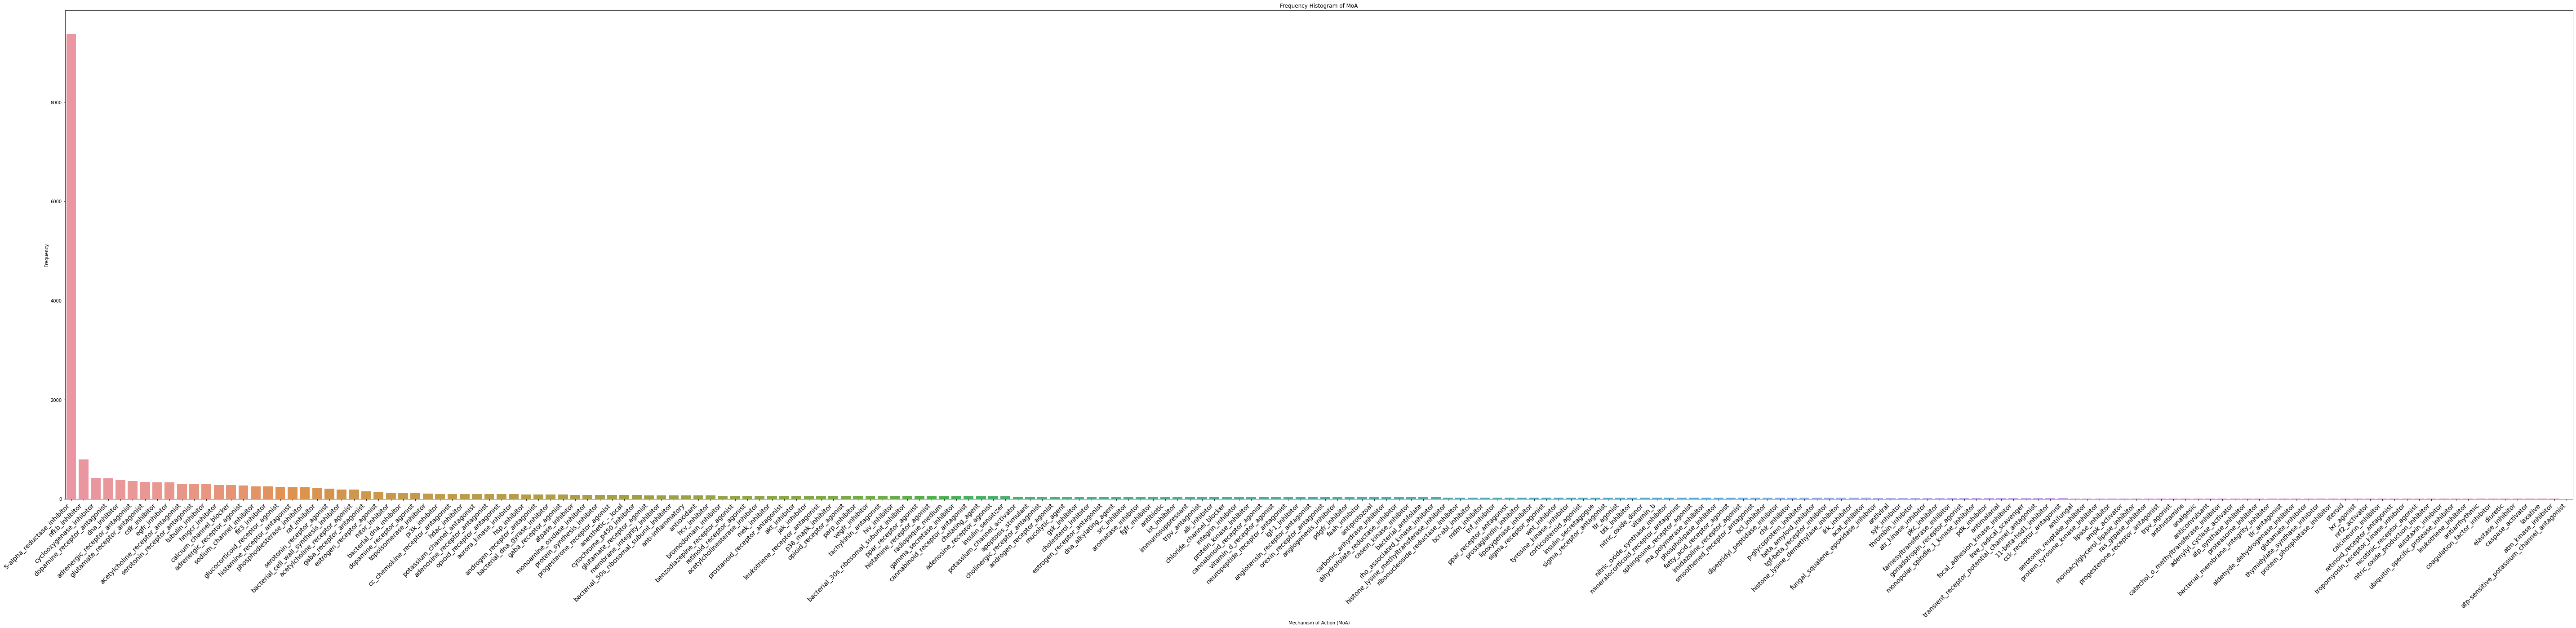

In [216]:
# Reference: https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
plt.figure(figsize=(100,20))
ax = sns.countplot(x="label",
                   data=y_target_col,
                   order = y_target_col['label'].value_counts().index)
_ = ax.set(xlabel="Mechanism of Action (MoA)", ylabel = "Frequency")
_ = ax.set_title('Frequency Histogram of MoA')
# Reference: https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

The different labels all have various frequencies. The dataset is obviously quite imbalanced. The next step is to create a frequency plot. It will be split amongst two groups: <100 and between 100;1,000

In [185]:
y_value_counts_under100 = y_value_counts[y_value_counts < 100]
y_value_counts_under100 = pd.DataFrame(y_value_counts_under100)
y_value_counts_under100.reset_index(level=0, inplace=True)
y_value_counts_under100 = y_value_counts_under100['label'].tolist()
y_value_counts_under100 = y_target_col[y_target_col['label'].isin(y_value_counts_under100)]

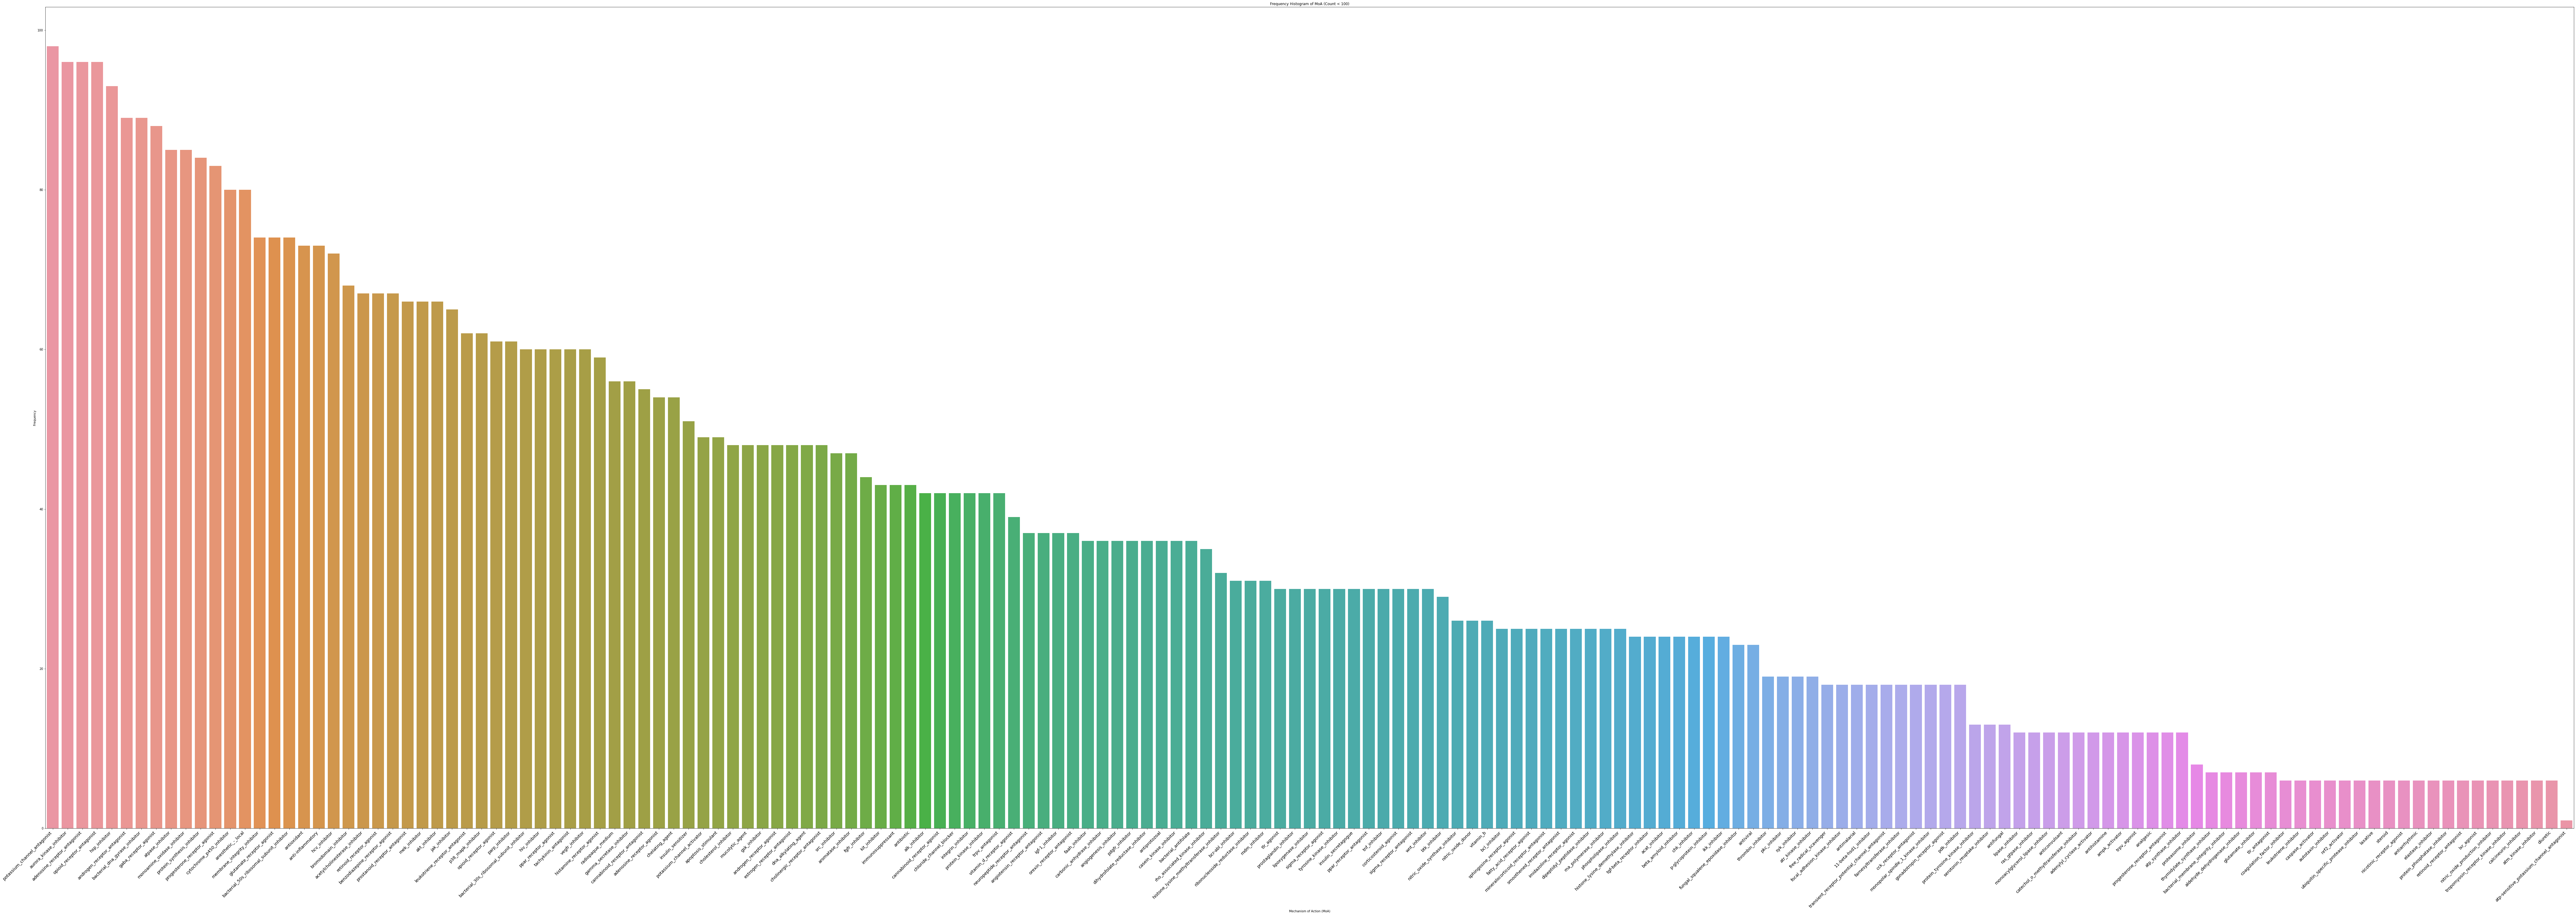

In [217]:
# Reference: https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
plt.figure(figsize=(150,50))
ax = sns.countplot(x="label",
                   data=y_value_counts_under100,
                   order = y_value_counts_under100['label'].value_counts().index)
_ = ax.set(xlabel="Mechanism of Action (MoA)", ylabel = "Frequency")
_ = ax.set_title('Frequency Histogram of MoA (Count < 100)')
# Reference: https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [187]:
y_value_counts_100to1000 = y_value_counts[(y_value_counts >= 100) & (y_value_counts < 1000)]
y_value_counts_100to1000 = pd.DataFrame(y_value_counts_100to1000)
y_value_counts_100to1000.reset_index(level=0, inplace=True)
y_value_counts_100to1000 = y_value_counts_100to1000['label'].tolist()
y_value_counts_100to1000 = y_target_col[y_target_col['label'].isin(y_value_counts_100to1000)]

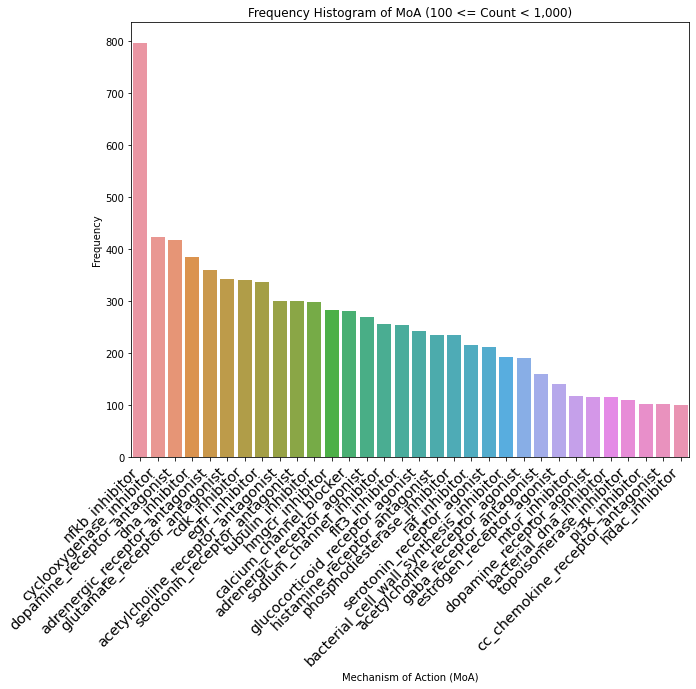

In [218]:
# Reference: https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
plt.figure(figsize=(10,8))
ax = sns.countplot(x="label",
                   data=y_value_counts_100to1000,
                   order = y_value_counts_100to1000['label'].value_counts().index)
_ = ax.set(xlabel="Mechanism of Action (MoA)", ylabel = "Frequency")
_ = ax.set_title('Frequency Histogram of MoA (100 <= Count < 1,000)')
# Reference: https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

## 2.2 Features
<a id="features"></a>
<a href="#top">Back to top</a>

In [140]:
X.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8     g-9    g-10    g-11    g-12    g-13    g-14    g-15    g-16    g-17    g-18    g-19    g-20    g-21    g-22    g-23    g-24    g-25    g-26    g-27    g-28    g-29    g-30    g-31    g-32    g-33    g-34    g-35    g-36    g-37    g-38    g-39    g-40    g-41    g-42    g-43    g-44    g-45    g-46    g-47    g-48    g-49    g-50    g-51    g-52    g-53    g-54    g-55    g-56    g-57    g-58    g-59    g-60    g-61    g-62    g-63    g-64    g-65    g-66    g-67    g-68    g-69    g-70    g-71    g-72    g-73    g-74    g-75    g-76    g-77    g-78    g-79    g-80    g-81    g-82    g-83    g-84    g-85    g-86    g-87    g-88    g-89    g-90    g-91    g-92    g-93    g-94    g-95    g-96    g-97    g-98    g-99   g-100   g-101   g-102   g-103   g-104   g-105   g-106   g-107   g-108   g-109   g-110   g-111   g-112   g-113   g-114   g-115   g-116   g-117   g-118   g-119   g-120   g-121   g-122   g-123   g-124   g-125   g-126   g-127   g-128   g-129   g-130   g-131   g-132   g-133   g-134   g-135   g-136   g-137   g-138   g-139   g-140   g-141   g-142   g-143   g-144   g-145   g-146   g-147   g-148   g-149   g-150   g-151   g-152   g-153   g-154   g-155   g-156   g-157   g-158   g-159   g-160   g-161   g-162   g-163   g-164   g-165   g-166   g-167   g-168   g-169   g-170   g-171   g-172   g-173   g-174   g-175   g-176   g-177   g-178   g-179   g-180   g-181   g-182   g-183   g-184   g-185   g-186   g-187   g-188   g-189   g-190   g-191   g-192   g-193   g-194   g-195   g-196   g-197   g-198   g-199   g-200   g-201   g-202   g-203   g-204   g-205   g-206   g-207   g-208   g-209   g-210   g-211   g-212   g-213   g-214   g-215   g-216   g-217   g-218   g-219   g-220   g-221   g-222   g-223   g-224   g-225   g-226   g-227   g-228   g-229   g-230   g-231   g-232   g-233   g-234   g-235   g-236   g-237   g-238   g-239   g-240   g-241   g-242   g-243   g-244   g-245   g-246   g-247   g-248   g-249   g-250   g-251   g-252   g-253   g-254   g-255   g-256   g-257   g-258   g-259   g-260   g-261   g-262   g-263   g-264   g-265   g-266   g-267   g-268   g-269   g-270   g-271   g-272   g-273   g-274   g-275   g-276   g-277   g-278   g-279   g-280   g-281   g-282   g-283   g-284   g-285   g-286   g-287   g-288   g-289   g-290   g-291   g-292   g-293   g-294   g-295   g-296   g-297   g-298   g-299   g-300   g-301   g-302   g-303   g-304   g-305   g-306   g-307   g-308   g-309   g-310   g-311   g-312   g-313   g-314   g-315   g-316   g-317   g-318   g-319   g-320   g-321   g-322   g-323   g-324   g-325   g-326   g-327   g-328   g-329   g-330   g-331   g-332   g-333   g-334   g-335   g-336   g-337   g-338   g-339   g-340   g-341   g-342   g-343   g-344   g-345   g-346   g-347   g-348   g-349   g-350   g-351   g-352   g-353   g-354   g-355   g-356   g-357   g-358   g-359   g-360   g-361   g-362   g-363   g-364   g-365   g-366   g-367   g-368   g-369   g-370   g-371   g-372   g-373   g-374   g-375   g-376   g-377   g-378   g-379   g-380   g-381   g-382   g-383   g-384   g-385   g-386   g-387   g-388   g-389   g-390   g-391   g-392   g-393   g-394   g-395   g-396   g-397   g-398   g-399   g-400   g-401   g-402   g-403   g-404   g-405   g-406   g-407   g-408   g-409   g-410   g-411   g-412   g-413   g-414   g-415   g-416   g-417   g-418   g-419   g-420   g-421   g-422   g-423   g-424   g-425   g-426   g-427   g-428   g-429   g-430   g-431   g-432   g-433   g-434   g-435   g-436   g-437   g-438   g-439   g-440   g-441   g-442   g-443   g-444   g-445   g-446   g-447   g-448   g-449   g-450   g-451   g-452   g-453   g-454   g-455   g-456   g-457   g-458   g-459   g-460   g-461   g-462   g-463   g-464   g-465   g-466   g-467   g-468   g-469   g-470   g-471   g-472   g-473   g-474   g-475   g-476   g-477   g-478   g-479   g-480   g-481   g-482   g-483   g-484   g-485   g-486   g-487   g-488   g-489   g-490   g-491   g-492   g-493   g-494   g-495 

In [144]:
X.dtypes.head(8) # most are all numeric, only the sig_id, cp_type, and cp_dose are categorical
# cp_time can be considered categorical also

sig_id      object
cp_type     object
cp_time      int64
cp_dose     object
g-0        float64
g-1        float64
g-2        float64
g-3        float64
dtype: object

### 2.2.1 Categorical Features
<a id="cat_feat"></a>
<a href="#top">Back to top</a>

In [190]:
cp_type = X.iloc[:,1]
cp_type.value_counts()

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64

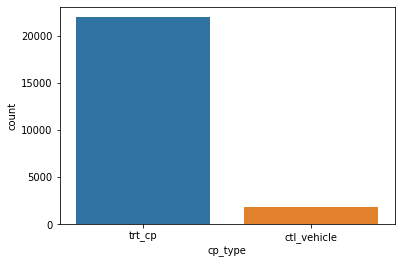

In [198]:
_ = sns.countplot(x='cp_type', data=X)

In [191]:
cp_time = X.iloc[:,2]
cp_time.value_counts()

48    8250
72    7792
24    7772
Name: cp_time, dtype: int64

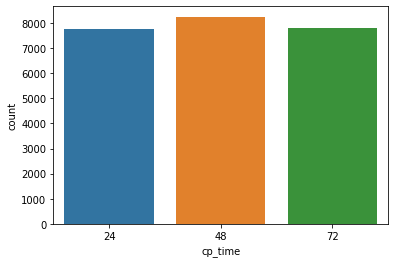

In [197]:
_ = sns.countplot(x='cp_time', data=X)

In [192]:
cp_dose = X.iloc[:,3]
cp_dose.value_counts()

D1    12147
D2    11667
Name: cp_dose, dtype: int64

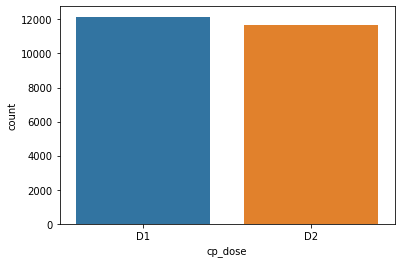

In [196]:
_ = sns.countplot(x='cp_dose', data=X)

### 2.2.1 Numerical Features
<a id="num_feat"></a>
<a href="#top">Back to top</a>

In [203]:
X_describe = X.iloc[:,1:].describe() # statistics on the numeric attributes
X_describe

cp_time           g-0           g-1           g-2           g-3           g-4           g-5           g-6           g-7           g-8           g-9          g-10          g-11          g-12          g-13          g-14          g-15          g-16          g-17          g-18          g-19          g-20          g-21          g-22          g-23          g-24          g-25          g-26          g-27          g-28          g-29          g-30          g-31          g-32          g-33          g-34          g-35          g-36          g-37          g-38          g-39          g-40          g-41          g-42          g-43          g-44          g-45          g-46          g-47          g-48          g-49          g-50          g-51          g-52          g-53          g-54          g-55          g-56          g-57          g-58          g-59          g-60          g-61          g-62          g-63          g-64          g-65          g-66          g-67          g-68          g-69          g-70          g-71          g-72          g-73          g-74          g-75          g-76          g-77          g-78          g-79          g-80          g-81          g-82          g-83          g-84          g-85          g-86          g-87          g-88          g-89          g-90          g-91          g-92          g-93          g-94          g-95          g-96          g-97          g-98          g-99         g-100         g-101         g-102         g-103         g-104         g-105         g-106         g-107         g-108         g-109         g-110         g-111         g-112         g-113         g-114         g-115         g-116         g-117         g-118         g-119         g-120         g-121         g-122         g-123         g-124         g-125         g-126         g-127         g-128         g-129         g-130         g-131         g-132         g-133         g-134         g-135         g-136         g-137         g-138         g-139         g-140         g-141         g-142         g-143         g-144         g-145         g-146         g-147         g-148         g-149         g-150         g-151         g-152         g-153         g-154         g-155         g-156         g-157         g-158         g-159         g-160         g-161         g-162         g-163         g-164         g-165         g-166         g-167         g-168         g-169         g-170         g-171         g-172         g-173         g-174         g-175         g-176         g-177         g-178         g-179         g-180         g-181         g-182         g-183         g-184        g-185         g-186         g-187         g-188         g-189         g-190         g-191         g-192         g-193         g-194         g-195         g-196         g-197         g-198         g-199         g-200         g-201         g-202         g-203         g-204         g-205         g-206         g-207         g-208         g-209         g-210         g-211         g-212         g-213         g-214         g-215         g-216         g-217         g-218         g-219         g-220         g-221         g-222         g-223         g-224         g-225         g-226         g-227         g-228         g-229         g-230         g-231         g-232         g-233         g-234         g-235         g-236         g-237         g-238         g-239         g-240         g-241         g-242         g-243         g-244         g-245         g-246         g-247         g-248         g-249         g-250         g-251         g-252         g-253         g-254         g-255         g-256         g-257         g-258         g-259         g-260         g-261         g-262         g-263         g-264         g-265         g-266        g-267         g-268         g-269         g-270         g-271         g-272         g-273         g-274         g-275         g-276         g-277         g-278         g-279         g-280         g-281         g-282         g-283         g-284     

all numeric features have some variance, i.e., none are constant vectors with single values

In [202]:
min(X_describe.loc['std',:])

0.5772995629320112

### Split g- and c- features

# 3. Code Test
<a id="test"></a>
<a href="#top">Back to top</a>

## Problem:
The issue is trying to figure out a working pipeline to go from the given dataset and output the predictions to kaggle. Normally, this sort of step is not required, but since we need to submit it to kaggle that means that there needs to be some small steps taken to ensure that the correct files are going back and forth.

We are given the kaggle data, which basically has the data split by feature/target and train/test. So, for the training data, there are:

23,814 examples, 875 features (excluding the unique identifier), 206 class labels (excluding the unique identifier)

For the testing data, there are:

3,982 examples, 875 features (excluding the unique identifier), 206 class labels (excluding the unique identifier)

In the typical process, the target vector is a single $n\times 1$ vector. It is possible to convert the 206 columns into a single column with the class labels as values. However, they're already in a OHE state.

Possibilities:
1. Convert to single target vector. Use the pipeline to re-OHE the class labels. Likewise, OHE the categorical variables. This process is important for using sk-learn, since the library seems to prefer having the single target vector rather than a provided OHE set of columns.
    - A difficulty with this however is that the data needs to also be split into K folds for k-fold CV.
        - Another issue is that each of the splits will not have all the classes.
        - However, it also must be such that 5-fold CV is used to tune the model, then a final test model is used based on those parameters to output a set of labels.
        
Cross-Validation stage:
- Perform 5-fold CV for a simple logistic regression model in sklearn.
- Find the tuned weights

## try a simple approach first:

In [44]:
train_features = pd.read_csv('../input/train_features.csv')
train_labels_ohe = pd.read_csv('../input/train_targets_scored.csv')

In [26]:
train_features.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5     g-6     g-7     g-8     g-9    g-10    g-11    g-12  \
0 -0.1944 -1.0120 -1.0220 -0.0326  0.5548 -0.0921  1.1830  0.1530  0.5574   
1  1.0190  0.5207  0.2341  0.3372 -0.4047  0.8507 -1.1520 -0.4201 -0.0958   
2 -0.0323  1.2390  0.1715  0.2155  0.0065  1.2300 -0.4797 -0.5631 -0.0366   
3  4.0620 -0.8095 -1.9590  0.1792 -0.1321 -1.0600 -0.8269 -0.3584 -0.8511   
4  1.4180 -0.8244 -0.2800 -0.1498 -0.8789  0.8630 -0.2219 -0.5121 -0.9577   

     g-13    g-14    g-15    g-16    g-17    g-18    g-19    g-20    g-21  \
0 -0.4015  0.1789 -0.6528 -0.7969  0.6342  0.1778 -0.3694 -0.5688 -1.1360   
1  0.4590  0.0803  0.2250  0.5293  0.2839 -0.3494  0.2883  0.9449 -0.1646   
2 -1.8300  0.6057 -0.3278  0.6042 -0.3075 -0.1147 -0.0570 -0.0799 -0.8181   
3 -0.5844 -2.5690  0.8183 -0.0532 -0.8554  0.1160 -2.3520  2.1200 -1.1580   
4  1.1750  0.2042  0.1970  0.1244 -1.7090 -0.3543 -0.5160 -0.3330 -0.2685   

     g-22    g-23    g-24    g-25    g-26    g-27    g-28    g-29    g-30  \
0 -1.1880  0.6940  0.4393  0.2664  0.1907  0.1628 -0.2853  0.5819  0.2934   
1 -0.2657 -0.3372  0.3135 -0.4316  0.4773  0.2075 -0.4216 -0.1161 -0.0499   
2 -1.5320  0.2307  0.4901  0.4780 -1.3970  4.6240 -0.0437  1.2870 -1.8530   
3 -0.7191 -0.8004 -1.4670 -0.0107 -0.8995  0.2406 -0.2479 -1.0890 -0.7575   
4  0.7649  0.2057  1.3720  0.6835  0.8056 -0.3754 -1.2090  0.2965 -0.0712   

     g-31    g-32    g-33    g-34    g-35    g-36    g-37    g-38    g-39  \
0 -0.5584 -0.0916 -0.3010 -0.1537  0.2198  0.2965 -0.5055 -0.5119 -0.2162   
1 -0.2627  0.9959 -0.2483  0.2655 -0.2102  0.1656  0.5300 -0.2568 -0.0455   
2  0.6069  0.4290  0.1783  0.0018 -1.1800  0.1256 -0.1219  5.4470  1.0310   
3  0.0881 -2.7370  0.8745  0.5787 -1.6740 -1.6720 -1.2690  3.0900 -0.3814   
4  0.6389  0.6674 -0.0783  1.1740 -0.7110 -1.4470  1.0620  0.7888 -0.0848   

     g-40    g-41    g-42    g-43    g-44    g-45    g-46    g-47    g-48  \
0 -0.0347 -0.2566 -1.1980  0.3116 -1.0330  0.2208 -0.1143 -0.0251  0.0350   
1  0.1194 -0.3958 -1.1730  0.4509  1.9250  1.1010  0.2648 -0.3615  0.1710   
2  0.3477 -0.5561  0.0357 -0.3636 -0.4653 -0.8346  0.1113 -0.7615 -0.4983   
3 -0.7229 -0.0010  0.1353 -1.6400 -0.7483 -1.0820 -0.1521  0.0747 -0.4851   
4  0.1302  0.1224  0.9584  0.2126  0.6162  1.1570  1.1140 -0.9416 -0.3780   

     g-49    g-50    g-51    g-52    g-53    g-54    g-55    g-56    g-57  \
0  0.4233 -0.1221 -0.4927  0.6119  0.4715 -0.0351 -0.1605 -0.6750  0.2263   
1 -0.8900  1.2730 -0.5036 -0.2277 -0.7339 -0.4283 -0.1231 -0.6328  0.4759   
2  0.4552 -0.0978 -0.2661  0.6058  0.2686 -0.6191 -0.4444  1.2540  0.0621   
3  0.6636 -2.8230 -0.6035 -1.3550  2.0200 -0.5301 -1.3240 -0.5936  0.4331   
4 -0.8147 -0.0803 -0.3818  0.6877  0.0000  0.1776  1.1320 -0.1180  1.2130   

     g-58    g-59    g-60    g-61    g-62    g-63    g-64    g-65    g-66  \
0  0.5790  0.9588  0.6061 -0.1300  0.6611 -0.3136 -0.2020  0.0251  0.1670   
1  0.3249 -0.7408 -0.5814  1.7840 -0.1087  1.0350  0.4087 -0.6948 -0.8026   
2 -0.1757 -1.4370  0.5553  0.8346 -0.3334 -0.2933 -0.1644 -1.1280 -0.0292   
3  0.0899 -1.5240  0.3936  1.4630 -1.2100 -1.2340 -1.0300  0.7977  0.2314   
4  0.7709  0.6745  0.7871  1.6410  0.1806  1.3480  1.1070  0.5392  0.0000   

     g-67    g-68    g-69    g-70    g-71    g-72    g-73    g-74    g-75  \
0 -0.4195  0.6551 -0.7395 -0.7047 -0.5369  0.0314 -0.5239 -0.3406 -0.6332   
1  0.0954 -0.4054  0.1197  0.1956  0.0720 -0.2463 -0.1084  0.4008 -0.5857   
2  0.0939  0.5916  0.6809  0.7821  0.6801  0.9634  0.4057 -0.0708 -1.3570   
3  

In [27]:
train_labels_ohe.head()

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  adrenergic_receptor_agonist  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   adrenergic_receptor_antagonist  akt_inhibitor  \
0                               0              0   
1                               0              0   
2                               0              0   
3                               0              0   
4                               0              0   

   aldehyde_dehydrogenase_inhibitor  alk_inhibitor  ampk_activator  analgesic  \
0                                 0              0               0          0   
1                                 0              0               0          0   
2                                 0              0               0          0   
3                                 0              0               0          0   
4                                 0              0               0          0   

   androgen_receptor_agonist  androgen_receptor_antagonist  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   anesthetic_-_local  angiogenesis_inhibitor  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   

   angiotensin_receptor_antagonist  anti-inflammatory  antiarrhythmic  \
0                                0                  0               0   
1                                0                  0               0   
2                                0                  0               0   
3                                0                  0               0   
4                                0                  0               0   

   antibiotic  anticonvulsant  antifungal  antihistamine  antimalarial  \
0           0               0           0              0             0   
1          

In [45]:
train_features.drop(train_features.columns[0], axis=1,inplace=True)
train_labels_ohe.drop(train_labels_ohe.columns[0], axis=1,inplace=True)

In [56]:
# from sklearn import model_selection
# from sklearn import preprocessing
# from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold

In [47]:
# Save the column names
train_features_col_names = train_features.columns.tolist()

cat_cols = ['cp_type', 'cp_time', 'cp_dose'] # Identify categorical columns

ohe = OneHotEncoder() # Load OHE

# Get the column names after OHE
# Reference: https://stackoverflow.com/questions/54570947/feature-names-from-onehotencoder
_ = ohe.fit_transform(train_features[cat_cols])
ohe_names = ohe.get_feature_names(cat_cols)
ohe_names = ohe_names.tolist()

In [50]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), list(range(0,3)))], remainder='passthrough')
train_features = ct.fit_transform(train_features)

In [51]:
train_features = pd.DataFrame(train_features)
train_features.columns = ohe_names

In [52]:
train_features.head()

cp_type_ctl_vehicle  cp_type_trt_cp  cp_time_24  cp_time_48  cp_time_72  \
0                  0.0             1.0         1.0         0.0         0.0   
1                  0.0             1.0         0.0         0.0         1.0   
2                  0.0             1.0         0.0         1.0         0.0   
3                  0.0             1.0         0.0         1.0         0.0   
4                  0.0             1.0         0.0         0.0         1.0   

   cp_dose_D1  cp_dose_D2     g-0     g-1     g-2     g-3     g-4     g-5  \
0         1.0         0.0  1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120   
1         1.0         0.0  0.0743  0.4087  0.2991  0.0604  1.0190  0.5207   
2         1.0         0.0  0.6280  0.5817  1.5540 -0.0764 -0.0323  1.2390   
3         1.0         0.0 -0.5138 -0.2491 -0.2656  0.5288  4.0620 -0.8095   
4         0.0         1.0 -0.3254 -0.4009  0.9700  0.6919  1.4180 -0.8244   

      g-6     g-7     g-8     g-9    g-10    g-11    g-12    g-13    g-14  \
0 -1.0220 -0.0326  0.5548 -0.0921  1.1830  0.1530  0.5574 -0.4015  0.1789   
1  0.2341  0.3372 -0.4047  0.8507 -1.1520 -0.4201 -0.0958  0.4590  0.0803   
2  0.1715  0.2155  0.0065  1.2300 -0.4797 -0.5631 -0.0366 -1.8300  0.6057   
3 -1.9590  0.1792 -0.1321 -1.0600 -0.8269 -0.3584 -0.8511 -0.5844 -2.5690   
4 -0.2800 -0.1498 -0.8789  0.8630 -0.2219 -0.5121 -0.9577  1.1750  0.2042   

     g-15    g-16    g-17    g-18    g-19    g-20    g-21    g-22    g-23  \
0 -0.6528 -0.7969  0.6342  0.1778 -0.3694 -0.5688 -1.1360 -1.1880  0.6940   
1  0.2250  0.5293  0.2839 -0.3494  0.2883  0.9449 -0.1646 -0.2657 -0.3372   
2 -0.3278  0.6042 -0.3075 -0.1147 -0.0570 -0.0799 -0.8181 -1.5320  0.2307   
3  0.8183 -0.0532 -0.8554  0.1160 -2.3520  2.1200 -1.1580 -0.7191 -0.8004   
4  0.1970  0.1244 -1.7090 -0.3543 -0.5160 -0.3330 -0.2685  0.7649  0.2057   

     g-24    g-25    g-26    g-27    g-28    g-29    g-30    g-31    g-32  \
0  0.4393  0.2664  0.1907  0.1628 -0.2853  0.5819  0.2934 -0.5584 -0.0916   
1  0.3135 -0.4316  0.4773  0.2075 -0.4216 -0.1161 -0.0499 -0.2627  0.9959   
2  0.4901  0.4780 -1.3970  4.6240 -0.0437  1.2870 -1.8530  0.6069  0.4290   
3 -1.4670 -0.0107 -0.8995  0.2406 -0.2479 -1.0890 -0.7575  0.0881 -2.7370   
4  1.3720  0.6835  0.8056 -0.3754 -1.2090  0.2965 -0.0712  0.6389  0.6674   

     g-33    g-34    g-35    g-36    g-37    g-38    g-39    g-40    g-41  \
0 -0.3010 -0.1537  0.2198  0.2965 -0.5055 -0.5119 -0.2162 -0.0347 -0.2566   
1 -0.2483  0.2655 -0.2102  0.1656  0.5300 -0.2568 -0.0455  0.1194 -0.3958   
2  0.1783  0.0018 -1.1800  0.1256 -0.1219  5.4470  1.0310  0.3477 -0.5561   
3  0.8745  0.5787 -1.6740 -1.6720 -1.2690  3.0900 -0.3814 -0.7229 -0.0010   
4 -0.0783  1.1740 -0.7110 -1.4470  1.0620  0.7888 -0.0848  0.1302  0.1224   

     g-42    g-43    g-44    g-45    g-46    g-47    g-48    g-49    g-50  \
0 -1.1980  0.3116 -1.0330  0.2208 -0.1143 -0.0251  0.0350  0.4233 -0.1221   
1 -1.1730  0.4509  1.9250  1.1010  0.2648 -0.3615  0.1710 -0.8900  1.2730   
2  0.0357 -0.3636 -0.4653 -0.8346  0.1113 -0.7615 -0.4983  0.4552 -0.0978   
3  0.1353 -1.6400 -0.7483 -1.0820 -0.1521  0.0747 -0.4851  0.6636 -2.8230   
4  0.9584  0.2126  0.6162  1.1570  1.1140 -0.9416 -0.3780 -0.8147 -0.0803   

     g-51    g-52    g-53    g-54    g-55    g-56    g-57    g-58    g-59  \
0 -0.4927  0.6119  0.4715 -0.0351 -0.1605 -0.6750  0.2263  0.5790  0.9588   
1 -0.5036 -0.2277 -0.7339 -0.4283 -0.1231 -0.6328  0.4759  0.3249 -0.7408   
2 -0.2661  0.6058  0.2686 -0.6191 -0.4444  1.2540  0.0621 -0.1757 -1.4370   
3 -0.6035 -1.3550  2.0200 -0.5301 -1.3240 -0.5936  0.4331  0.0899 -1.5240   
4 -0.3818  0.6877  0.0000  0.1776  1.1320 -0.1180  1.2130  0.7709  0.6745   

     g-60    g-61    g-62    g-63    g-64    g-65    g-66    g-67    g-68  \
0  0.6061 -0.1300  0.6611 -0.3136 -0.2020  0.0251  0.1670 -0.4195  0.6551   
1 -0.5814  1.7840 -0.1087  1.0350  0.4087 -0.6948 -0.8026  0.0954 -0.4054   
2  0.5553  0.8346 -0.3334 -0.2933 -0.1644 -1.1280 -0.0292  0.0

In [54]:
# Reverse the OHE labels
y = train_labels_ohe.iloc[:,:].idxmax(axis=1)
y = pd.DataFrame(y)
y.columns = ['target']

In [57]:
df = pd.concat([train_features, y], axis=1) # Recombine into single df

df['kfold'] = -1 # Create k-folds column

df = df.sample(frac=1).reset_index(drop=True) # Randomize the dataset

y = df.target.values # Subset the target column

# Initialize the stratified k-fold module from sklearn
kf = StratifiedKFold(n_splits=5)

In [58]:
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f

/Users/jaredyu/Desktop/projects/learn_pytorch/env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [59]:
df.head()

cp_type_ctl_vehicle  cp_type_trt_cp  cp_time_24  cp_time_48  cp_time_72  \
0                  0.0             1.0         0.0         0.0         1.0   
1                  0.0             1.0         1.0         0.0         0.0   
2                  0.0             1.0         1.0         0.0         0.0   
3                  0.0             1.0         0.0         0.0         1.0   
4                  0.0             1.0         0.0         1.0         0.0   

   cp_dose_D1  cp_dose_D2     g-0     g-1     g-2     g-3     g-4     g-5  \
0         1.0         0.0 -0.5252 -0.1966 -0.4326 -1.6010 -0.0979 -0.5824   
1         0.0         1.0  1.0110  0.0853 -0.1791  1.0410 -0.1094  0.1357   
2         1.0         0.0  6.9750  1.6810  0.0146  0.6303  1.3450 -0.9692   
3         0.0         1.0  1.0640  0.4926 -1.2000 -0.8149  1.3620 -3.9920   
4         0.0         1.0 -0.2354 -0.8510 -0.7811 -0.9143 -0.4581  1.3530   

      g-6     g-7     g-8     g-9    g-10    g-11    g-12    g-13    g-14  \
0  1.2400 -1.1320  3.8110 -1.6400 -0.8805  0.6966 -0.6449  1.6910 -1.5910   
1 -1.2170 -1.3650 -2.1140  0.3799 -0.4532  0.6190 -0.3088  1.1310  0.7032   
2  1.5310 -4.3250 -3.8980 -2.9130 -6.2370  2.5000 -0.5567  5.5540 -2.6970   
3  1.4970  1.1360 -0.4575  0.0169 -0.4342  2.0160  0.0249  0.9472 -1.5660   
4  0.2798 -0.0431  0.2436 -0.3456 -0.3131 -0.3446  5.9310  0.7345  0.5891   

     g-15    g-16    g-17    g-18    g-19    g-20    g-21    g-22    g-23  \
0  0.1912 -1.5460  0.1639 -1.3360 -0.1752  4.1860  0.4089 -3.0670 -0.8927   
1 -0.0469 -1.5670  0.6574 -0.2948  0.0748  0.8485  0.1249  0.9612  0.3763   
2 -4.4600 -2.8680 -3.2480  0.3683 -0.5958 -3.1210 -2.1690 -2.9930 -0.1474   
3 -0.4033 -0.1857  0.0847  0.6673  1.4400 -0.3413  0.4487 -0.1400  0.4446   
4 -0.5437  0.9080 -0.2136  0.6725 -0.1826  0.8457  0.1578 -0.9129  0.1045   

     g-24    g-25    g-26    g-27   g-28    g-29    g-30    g-31    g-32  \
0 -2.5370 -0.7134 -2.5740  2.1360  1.209  0.5850 -0.7951  0.5484 -1.7800   
1 -0.3153 -0.1377 -0.1217  0.0149 -1.530 -0.9072 -1.1320  0.0281 -0.7329   
2 -1.8630  0.0819 -1.8480 -2.3880 -2.823 -1.5360 -2.2420  2.9660 -0.8317   
3  0.3993 -0.0572 -0.2091 -0.2446 -1.456 -0.0505  0.3392 -0.4316  1.9390   
4 -0.3335  0.8198 -0.5735 -0.8853  1.052  0.0298  0.3195  1.8070  0.0891   

     g-33    g-34    g-35    g-36     g-37    g-38    g-39    g-40    g-41  \
0  1.2990 -1.2520 -2.0280 -1.1170  -1.8250  5.0780  2.0570 -4.7270  1.8450   
1 -0.9502 -0.1513  1.3080 -1.0560  -0.4573  0.7024  0.5807 -1.8290 -0.0911   
2 -3.9690  1.2510 -0.5765 -8.2540 -10.0000  5.3830  1.2940 -1.0730 -0.6742   
3 -0.8830 -0.2129 -0.6840 -0.4137  -0.9493  0.7455  0.8232  0.4397  1.2210   
4  0.7471 -0.1066 -0.2482 -0.6151   0.4408  0.0551  0.2575 -0.0404  0.7196   

     g-42    g-43    g-44    g-45    g-46    g-47    g-48    g-49     g-50  \
0 -2.6830 -0.0989  1.7450 -2.4620  1.1760 -2.6470 -2.3210 -0.3764  -3.1390   
1 -0.2284  0.5607 -1.4520 -2.1230 -0.5008  2.4130 -0.2041  0.8661  -2.8290   
2 -1.5400  0.4980  4.6630  2.2270  0.6617  0.3648  3.3520 -0.6695 -10.0000   
3  1.2930 -0.3582  0.2208  0.5227 -0.7090  0.4685 -0.6830 -1.0930  -0.3491   
4  0.0055  0.8425  1.2700  1.0500 -0.6137  0.2405  0.8651  0.0054   0.5097   

     g-51    g-52    g-53    g-54    g-55    g-56    g-57    g-58    g-59  \
0 -0.3456 -0.5585  1.6300  2.6070 -1.3240 -0.3903  0.3132 -0.0843 -0.4265   
1 -0.6100  0.6381 -0.7761  1.6110 -0.5065 -0.0984  0.6937  0.4961 -1.3480   
2 -1.8900 -1.6620  1.5770  2.0800 -0.6043 -0.8400  2.7120 -4.5800 -0.0626   
3 -0.7884  0.2359 -0.1276 -0.2430  1.0130 -0.8009 -0.4079  0.5562  0.8540   
4  0.9153 -0.7908  0.0261 -0.3372  0.5824  0.5483  1.0560  0.1535  0.6208   

     g-60    g-61    g-62    g-63    g-64    g-65    g-66    g-67    g-68  \
0 -2.1260 -1.3900 -1.6210 -1.9580 -0.3954  3.5930 -1.7310 -2.1020 -1.4510   
1  0.3580  0.9837 -0.2837 -0.7200 -0.5340 -0.1024  1.3300  0.1921  0.9425   
2 -2.7530 -0.7442 -4.8060 -7.8570  0.4555  3.2620  0.705

In [64]:
df.iloc[:,7:].head()

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0  0.3556  0.0043  0.2323  0.2668 -0.1663 -0.0711 -0.1495 -0.3359  0.4259   
1  0.1238 -0.2740  0.0707 -1.1170 -0.4968 -4.8560  0.4929 -3.4800  0.4897   
2 -0.9721 -1.0050 -1.0410 -0.0932 -0.5768  0.4008 -1.4000 -0.2422  0.2374   
3  1.2500 -0.2534  1.3440 -0.5193 -0.2973  0.8021  0.5034 -0.4465  1.5710   
4 -0.6086 -0.7263 -0.1372  0.2433  0.1802 -0.3521  0.2234  0.9454  1.1490   

      g-9    g-10    g-11    g-12    g-13    g-14    g-15    g-16    g-17  \
0  0.2803 -0.5246  0.0842 -0.3949 -0.3210  0.9984 -0.5672  2.6530  0.2531   
1 -0.0340  0.7599  1.2820  0.7274  0.0888 -1.0160  0.5591 -0.2220  0.2505   
2  0.4063  0.7493  0.6599  0.0940  0.4782  0.4121  0.0155  0.1347  0.1188   
3  0.5180  0.4585  0.2407  0.5299  2.0360  0.8263 -0.6365  0.4900  1.2120   
4  0.1704 -0.3591 -0.2735 -0.9457  0.1407 -0.3503 -0.8295  0.9779 -0.5507   

     g-18    g-19    g-20    g-21    g-22    g-23    g-24    g-25    g-26  \
0  0.1093 -0.5664 -0.5942  0.0494 -0.7973 -0.1931 -0.0921  0.4634  1.5850   
1  0.0873  0.1792 -0.6745  0.0690 -0.0938  1.5310 -1.2050  0.4012  1.5110   
2  0.4352 -0.0550  1.1760 -0.8005  0.3048 -0.2060 -0.3727 -0.3205  0.0259   
3 -0.8034 -0.9417 -0.4903  0.9445 -0.0476  0.4188  0.0741  0.2463 -0.0786   
4  0.1143  1.1160 -0.6044  0.8142 -1.1290 -0.2127  0.2441 -1.0700 -0.0961   

     g-27    g-28    g-29    g-30    g-31    g-32    g-33    g-34    g-35  \
0 -2.9500 -0.9318 -0.4819 -0.7129  1.3400  0.8936  1.7090 -0.1639 -0.3146   
1 -0.0136  0.2084 -0.1296  1.2830 -0.2090  0.0226 -0.1880 -0.2438  0.2763   
2 -0.0503 -0.4655  2.5460 -0.7546  1.0810 -1.0220  0.6070  0.0648 -0.7217   
3  1.5550  0.5002 -1.8330  1.8660 -0.1969  0.1930 -0.4945 -0.5747  1.6610   
4  0.0756 -0.1042  0.2030  0.2801  0.0098  0.5818  0.3474  0.9942  0.6657   

     g-36    g-37    g-38    g-39    g-40    g-41    g-42    g-43    g-44  \
0 -0.4125  0.0001  0.0014 -1.4150  0.1729  0.9298 -0.1517 -0.6439  0.4885   
1 -0.0829  0.3767  0.3535 -0.1377 -0.2692 -0.1535 -0.1860 -1.0580 -0.5233   
2  0.2699 -0.2883 -0.2343 -0.2506 -1.2810  0.6193 -0.9628 -0.8436 -0.4698   
3  0.4852 -1.0960 -2.3270 -0.8424 -0.0704  0.3539  1.1690  0.8965 -0.1171   
4 -0.8647 -0.8877 -0.7538 -0.1605 -0.1032 -0.2923 -1.4760 -0.0987 -2.4600   

     g-45    g-46    g-47    g-48    g-49    g-50    g-51    g-52    g-53  \
0 -2.9240  0.5396  0.4115  0.6955 -0.3257  0.7957  3.3680 -0.7312 -2.1240   
1  0.0403 -0.6503  0.1969  0.1862  0.5043 -0.5136 -0.0417  0.5465  1.0960   
2 -0.1044  0.7546  0.0303  0.4439 -0.1327  1.0260  0.2065 -0.5477  0.4650   
3  2.5910  0.0931 -0.7295  1.8820 -0.6756  0.8681 -0.9997 -0.9217  0.2691   
4 -0.1271  0.3780 -0.9474 -0.1616 -1.3290 -0.7031  0.4062  0.5482  0.4476   

     g-54    g-55    g-56    g-57    g-58    g-59    g-60    g-61    g-62  \
0 -0.1444 -0.1683  0.2186  1.6790  0.5774  0.6504 -0.9008 -0.3454 -0.2869   
1  0.2916 -0.2951 -0.4178  1.1190  0.6529  0.2030 -0.4298 -1.2820 -0.3495   
2  0.4619 -0.9214  0.8038  1.0070 -1.0770 -0.8727  0.3068 -2.2930 -0.6299   
3 -0.0694  0.9100 -0.0089  0.6719 -0.7666  2.2400 -5.7590  0.1684 -0.3397   
4  0.0661 -0.6914  0.6393 -1.3000 -0.6097  0.1050  0.0423  0.4130  0.7251   

     g-63    g-64    g-65    g-66    g-67    g-68    g-69    g-70    g-71  \
0 -0.3095  0.3204 -1.2820  0.7323  0.6564 -0.7186  0.2877 -0.0374 -0.8534   
1  0.1323  0.3499  0.1058 -0.0759 -0.0853  0.1569 -0.2484  0.5144 -0.6120   
2  0.0655 -0.5375 -0.2257  0.4615 -0.8952 -0.1897  0.0592  1.5170 -0.6478   
3 -0.5911  0.8860  2.9050 -1.3420  0.1381 -1.8060  1.0780 -2.3390  0.2600   
4  1.2330 -0.0064 -0.6801  0.1883 -0.1397  0.0348 -0.7852 -0.7301 -0.8619   

     g-72    g-73    g-74    g-75    g-76    g-77    g-78    g-79    g-80  \
0 -0.4992 -0.3307 -0.3372  1.3960 -0.0685 -0.7659  0.0851 -0.2437 -0.2591   
1  0.3450 -0.8819  1.1000  0.3467 -1.3820 -0.2713 -0.1794 -0.0067  0.0657   
2 -1.1000 -1.1150 -0.4173  1.8250  1.2730 -0.7620  0.2077 -0.2058 -0.96

## end simple approach

## test log reg

### Check for if the kfold column needs to be dropped.

In [133]:
# logres.py
import os

import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import config

fold=0
# def run(fold):
# Read the data
df = pd.read_csv(config.TRAINING_FILE)

# Separate into train and validation
df_train = df[df.kfold != fold].reset_index(drop=True)
df_valid = df[df.kfold == fold].reset_index(drop=True)

# Drop the target and and convert to numpy
x_train = df_train.drop(['target', 'kfold'], axis=1).values
y_train = df_train.target.values

# Repeat for validation data
x_valid = df_valid.drop(['target', 'kfold'], axis=1).values
y_valid = df_valid.target.values

In [65]:
# logres.py
import os

import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import config

fold=0
# def run(fold):
# Read the data
df = pd.read_csv(config.TRAINING_FILE)

# Separate into train and validation
df_train = df[df.kfold != fold].reset_index(drop=True)
df_valid = df[df.kfold == fold].reset_index(drop=True)

# Drop the target and and convert to numpy
x_train = df_train.drop('target', axis=1).values
y_train = df_train.target.values

# Repeat for validation data
x_valid = df_valid.drop('target', axis=1).values
y_valid = df_valid.target.values

# Apply feature scaling to the numeric attributes
sc = StandardScaler()
x_train[:,7:] = sc.fit_transform(x_train[:,7:])
x_valid[:,7:] = sc.transform(x_valid[:,7:])

# Intiialize the classifier
model = linear_model.LogisticRegression(random_state=0, max_iter=1e10)

# Fit the model
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000000000.0, random_state=0)

In [71]:
# Create predictions
valid_preds = model.predict_proba(x_valid)

### Issue, the predictions are missing 2 columns 204 rather than 206. The validation set includes 203 classes, while the train set includes 204 classes.

It would make sense that the y_preds are based on the classifier that has seen a number of classes equal to the number of classes in the training set. However, in trying to find the log-loss, the number of class predictions per observation is in this case larger than the number of classes in the validation set. Therefore, the log_loss function encounters this error.

A goal now is to find the associated labels with y_pred from y_train.

In [80]:
len(np.unique(y_valid)), len(np.unique(y_train))

(203, 204)

In [74]:
valid_preds.shape

(4763, 204)

In [87]:
valid_preds[:,0]

array([5.32213646e-11, 4.01969221e-06, 4.35742829e-06, ...,
       2.42710228e-06, 1.14620550e-06, 9.72081482e-08])

In [93]:
y_valid

array(['5-alpha_reductase_inhibitor', 'androgen_receptor_antagonist',
       '5-alpha_reductase_inhibitor', ..., 'anticonvulsant',
       'coagulation_factor_inhibitor', 'caspase_activator'], dtype=object)

In [91]:
# Calculate and print the accuracy
log_loss_score = metrics.log_loss(y_valid, valid_preds, labels=model.classes_)
print(f"Fold={fold}, Log-Loss={log_loss_score}")

Fold=0, Log-Loss=4.905376942363763


test the labels=classes_ with iris dataset

In [102]:
from sklearn.datasets import load_iris
iris = load_iris()

In [103]:
X = iris.data
y = iris.target

In [111]:
l1 = list(range(0,40))
l2 = list(range(50, 90))
l3 = list(range(100,140))

In [113]:
l1.extend(l2)
l1.extend(l3)

In [118]:
X_train = X[l1,:]
y_train = y[l1]

In [124]:
l4 = list(range(40,50))
l5 = list(range(90,100))
l4.extend(l5)
X_valid = X[l4,:]
y_valid = y[l4]

In [119]:
model = linear_model.LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

LogisticRegression()

In [121]:
valid_preds = model.predict_proba(X_valid)

In [123]:
valid_preds.shape

(20, 3)

In [125]:
log_loss_score = metrics.log_loss(y_valid, valid_preds)
print(f"Fold={fold}, Log-Loss={log_loss_score}")

ValueError: y_true and y_pred contain different number of classes 2, 3. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0 1]

In [126]:
log_loss_score = metrics.log_loss(y_valid, valid_preds, labels=model.classes_)
print(f"Fold={fold}, Log-Loss={log_loss_score}")

Fold=0, Log-Loss=0.08264716955034254


## end log reg test

train.py

In [20]:
import argparse
import os
import sys

sys.path.append('../src')
import config

import joblib
import pandas as pd
from sklearn import metrics
from sklearn import tree

# TRAINING_FILE = "../input/train_folds.csv"

# MODEL_OUTPUT = "../models/"

In [21]:
fold=0

In [22]:
df = pd.read_csv(config.TRAINING_FILE)

# Separate into train and validation
df_train = df[df.kfold != fold].reset_index(drop=True)
df_valid = df[df.kfold == fold].reset_index(drop=True)

# Drop the target and and convert to numpy
x_train = df_train.drop('target', axis=1).values
y_train = df_train.target.values

# Repeat for validation data
x_valid = df_valid.drop('target', axis=1).values
y_valid = df_valid.target.values

In [24]:
df_train.head()

cp_type_ctl_vehicle  cp_type_trt_cp  cp_time_24  cp_time_48  cp_time_72  \
0                  0.0             1.0         0.0         0.0         1.0   
1                  0.0             1.0         0.0         0.0         1.0   
2                  0.0             1.0         0.0         1.0         0.0   
3                  0.0             1.0         0.0         1.0         0.0   
4                  0.0             1.0         1.0         0.0         0.0   

   cp_dose_D1  cp_dose_D2     g-0     g-1     g-2     g-3     g-4     g-5  \
0         1.0         0.0  0.2044  0.6236  0.5353  0.6301  0.2669 -0.1056   
1         1.0         0.0 -0.0832  0.9535 -2.0320  0.3466  0.1426 -0.0838   
2         0.0         1.0 -0.4466 -0.7228  0.9767 -0.2143 -0.0046  0.2739   
3         1.0         0.0 -0.3856 -0.8728 -0.2931 -0.0506 -0.1245  0.1527   
4         1.0         0.0  0.0053 -0.7337 -0.0262 -0.5824  0.6319 -0.2395   

      g-6     g-7     g-8     g-9    g-10    g-11    g-12    g-13    g-14  \
0 -0.1626  0.6910 -1.1060  0.6684  0.5051 -0.2990 -0.2887 -0.7031  0.3114   
1  0.5120 -0.0583 -0.6292  0.1454 -0.0118  2.4670  0.2846 -0.4428 -0.6960   
2  0.8312 -0.0756 -0.9575  0.2605  0.0314 -0.2248 -0.3768  0.2603  0.4383   
3 -0.3097 -0.1913  0.3920  1.2980  0.1508  0.0249 -0.3078 -0.7002  1.0380   
4 -0.1143 -0.1174  0.6299  0.5396  0.5610 -1.1370 -0.0493  0.0433  0.3347   

     g-15    g-16    g-17    g-18    g-19    g-20    g-21    g-22    g-23  \
0 -0.5902  1.6700  0.1632  0.2084 -0.1188  0.1199  0.0853 -0.4823  0.2206   
1 -1.1300 -0.1206  0.0554  0.2212  0.1834  0.1521 -0.5548 -0.5425 -0.4225   
2  0.3895  0.7555 -0.5288  0.0270 -0.0565  0.7976 -0.2103 -0.7706  0.8181   
3  1.1580  1.4230 -0.5814  0.0021 -0.1877  0.6455 -0.0743  0.3978 -1.2910   
4 -0.4273 -0.5498  0.5587  0.2701 -0.5950 -0.0425 -0.3090 -0.9696 -0.1868   

     g-24    g-25    g-26    g-27    g-28    g-29    g-30    g-31    g-32  \
0  0.7494  0.0006  0.0540  1.1150 -0.1543 -0.0803  0.2155 -0.5359  0.4298   
1 -0.5905  0.5663 -0.1135 -0.3969 -0.1174  0.2971 -0.3321 -0.4502 -1.4860   
2 -0.1150 -2.3520  0.8588  0.6777 -0.8844  1.3080 -0.4142 -0.4286  0.2957   
3  0.3484  0.0103  0.1534  0.6100  0.5156  0.3949  0.7959  0.8438  0.2677   
4 -0.2732  0.6105 -0.1480 -0.6885 -0.2483  0.3079  0.2668  0.6255 -0.6935   

     g-33    g-34    g-35    g-36    g-37    g-38    g-39    g-40    g-41  \
0 -0.7965  0.2718 -0.1630  0.1217 -0.3323 -0.8145 -0.3734  0.6029  0.0725   
1 -0.5870  0.5558 -0.4158  0.4954 -0.5864 -0.5807  0.2638  0.3075 -0.2182   
2 -0.4330 -0.1078 -0.8142 -0.1012  1.4060 -0.8473  0.5187 -0.4143  0.2738   
3 -0.8849  0.3387  0.3383 -0.6253  0.4628 -0.5737  0.4977 -0.1467 -0.0272   
4  0.2938 -0.1773 -0.5253  1.0720  1.3590  0.2220  0.3127 -0.7750 -0.6014   

     g-42    g-43    g-44    g-45    g-46    g-47    g-48    g-49    g-50  \
0  0.7619  0.4849  0.1192  1.1800  0.0034  0.7822 -0.3704 -0.6319 -0.1189   
1  0.0689  1.1860 -0.0435  1.3800  0.2569  0.6080 -0.1790  0.4029 -0.1155   
2 -0.7382 -0.1847  0.1098  0.0603 -0.7068 -0.5581 -0.6745 -0.2051 -0.6362   
3 -0.3298 -0.1493  0.1498  0.1231 -0.1845 -0.4016  0.0846  0.2941  1.0240   
4  0.0896 -0.6125 -0.0403  0.1893 -0.0270 -0.2338 -0.9198 -0.2836  0.6689   

     g-51    g-52    g-53    g-54    g-55    g-56    g-57    g-58    g-59  \
0 -0.9657  0.6259 -0.7765 -0.5273  0.4369  0.3006 -1.3170  0.3499 -0.0249   
1 -0.3651  0.7764 -0.4162 -0.6452 -0.9777 -0.9945 -0.8296  0.0828 -0.3117   
2 -0.8691  0.0115 -0.1374  0.1883 -0.1648 -4.4830 -0.0885 -0.2199 -0.1363   
3 -0.4952  0.1087  0.6712 -0.8281  1.2450  0.7653 -0.3054 -0.7230 -0.4791   
4 -0.8928 -0.3310 -0.1659 -0.2439 -0.6342  0.2674 -0.5684  0.1748 -0.0915   

     g-60    g-61    g-62    g-63    g-64    g-65    g-66    g-67    g-68  \
0  0.3853  0.0301  1.2460  0.2727  0.6167 -0.5023 -0.1984  0.1360  0.0819   
1 -0.5008  0.0463  0.0073 -0.3238  0.1377 -0.8577  0.0182 -0.7093  0.7271   
2  0.6901 -0.0921 -0.5377  0.4908  0.3715 -0.0039  0.2210 -0.4

In [240]:
# Intiialize the classifier
clf = tree.DecisionTreeClassifier()

# Fit the model
clf.fit(x_train, y_train)

# Create predictions
preds = clf.predict(x_valid)

In [244]:
accuracy = metrics.accuracy_score(y_valid, preds)

In [245]:
accuracy

0.26432920428301493

In [ ]:
def run(fold):
    # Read the data
    df = pd.read_csv(config.TRAINING_FILE)

    # Separate into train and validation
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)

    # Drop the target and and convert to numpy
    x_train = df_train.drop('target', axis=1).values
    y_train = df_train.target.values

    # Repeat for validation data
    x_valid = df_valid.drop('target', axis=1).values
    y_valid = df_valid.target.values

    # Intiialize the classifier
    clf = tree.DecisionTreeClassifier()

    # Fit the model
    clf.fit(x_train, y_train)

    # Create predictions
    preds = clf.predict(x_valid)

    # Calculate and print the accuracy
    accuracy = metrics.accuracy_score(y_valid, preds)
    print(f"Fold={fold}, Accuracy={accuracy}")

    # Save the model
    joblib.dump(
        clf,
        os.path.join(config.MODEL_OUTPUT, f"dt_{fold}.bin")
    )

# if __name__ == "__main__":
#     # Initialize the argparse
#     parser = argparse.ArgumentParser()

#     # Add arguments to parser
#     parser.add_argument(
#         "--fold",
#         type=int
#     )
#     args = parser.parse_args() # Read arguments from command line

#     run(fold=args.fold) # Run the folds specified in the command line

In [278]:
from sklearn import preprocessing
from sklearn.compose import make_column_transformer

In [292]:
train_features = pd.read_csv('../input/train_features.csv')
train_labels_ohe = pd.read_csv('../input/train_targets_scored.csv')

# Drop the unique key column
train_features.drop(train_features.columns[0], axis=1,inplace=True)
train_features_col_names = train_features.columns.tolist()

In [293]:
cat_cols = ['cp_type', 'cp_time', 'cp_dose']

ohe = preprocessing.OneHotEncoder()
_ = ohe.fit_transform(train_features[cat_cols])
ohe_names = ohe.get_feature_names(cat_cols)
ohe_names = ohe_names.tolist()
columns_trans = make_column_transformer(
        (preprocessing.OneHotEncoder(),
        cat_cols),
        remainder='passthrough')
train_features = columns_trans.fit_transform(train_features)

train_features_col_names = [col for col in train_features_col_names if col not in cat_cols]

ohe_names.extend(train_features_col_names)

train_features = pd.DataFrame(train_features)
train_features.columns = ohe_names

In [301]:
train_features.head()

cp_type_ctl_vehicle  cp_type_trt_cp  cp_time_24  cp_time_48  cp_time_72  cp_dose_D1  cp_dose_D2     g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8     g-9    g-10    g-11    g-12    g-13    g-14    g-15    g-16    g-17    g-18    g-19    g-20    g-21    g-22    g-23    g-24    g-25    g-26    g-27    g-28    g-29    g-30    g-31    g-32    g-33    g-34    g-35    g-36    g-37    g-38    g-39    g-40    g-41    g-42    g-43    g-44    g-45    g-46    g-47    g-48    g-49    g-50    g-51    g-52    g-53    g-54    g-55    g-56    g-57    g-58    g-59    g-60    g-61    g-62    g-63    g-64    g-65    g-66    g-67    g-68    g-69    g-70    g-71    g-72    g-73    g-74    g-75    g-76    g-77    g-78    g-79    g-80    g-81    g-82    g-83    g-84    g-85    g-86    g-87    g-88    g-89    g-90    g-91    g-92    g-93    g-94    g-95    g-96    g-97    g-98    g-99   g-100   g-101   g-102   g-103   g-104   g-105   g-106   g-107   g-108   g-109   g-110   g-111   g-112   g-113   g-114   g-115   g-116   g-117   g-118   g-119   g-120   g-121   g-122   g-123   g-124   g-125   g-126   g-127   g-128   g-129   g-130   g-131   g-132   g-133   g-134   g-135   g-136   g-137   g-138   g-139   g-140   g-141   g-142   g-143   g-144   g-145   g-146   g-147   g-148   g-149   g-150   g-151   g-152   g-153   g-154   g-155   g-156   g-157   g-158   g-159   g-160   g-161   g-162   g-163   g-164   g-165   g-166   g-167   g-168   g-169   g-170   g-171   g-172   g-173   g-174   g-175   g-176   g-177   g-178   g-179   g-180   g-181   g-182   g-183   g-184   g-185   g-186   g-187   g-188   g-189   g-190   g-191   g-192   g-193   g-194   g-195   g-196   g-197   g-198   g-199   g-200   g-201   g-202   g-203   g-204   g-205   g-206   g-207   g-208   g-209   g-210   g-211   g-212   g-213   g-214   g-215   g-216   g-217   g-218   g-219   g-220   g-221   g-222   g-223   g-224   g-225   g-226   g-227   g-228   g-229   g-230   g-231   g-232   g-233   g-234   g-235   g-236   g-237   g-238   g-239   g-240   g-241   g-242   g-243   g-244   g-245   g-246   g-247   g-248   g-249   g-250   g-251   g-252   g-253   g-254   g-255   g-256   g-257   g-258   g-259   g-260   g-261   g-262   g-263   g-264   g-265   g-266   g-267   g-268   g-269   g-270   g-271   g-272   g-273   g-274   g-275   g-276   g-277   g-278   g-279   g-280   g-281   g-282   g-283   g-284   g-285   g-286   g-287   g-288   g-289   g-290   g-291   g-292   g-293   g-294   g-295   g-296   g-297   g-298   g-299   g-300   g-301   g-302   g-303   g-304   g-305   g-306   g-307   g-308   g-309   g-310   g-311   g-312   g-313   g-314   g-315   g-316   g-317   g-318   g-319   g-320   g-321   g-322   g-323   g-324   g-325   g-326   g-327   g-328   g-329   g-330   g-331   g-332   g-333   g-334   g-335   g-336   g-337   g-338   g-339   g-340   g-341   g-342   g-343   g-344   g-345   g-346   g-347   g-348   g-349   g-350   g-351   g-352   g-353   g-354   g-355   g-356   g-357   g-358   g-359   g-360   g-361   g-362   g-363   g-364   g-365   g-366   g-367   g-368   g-369   g-370   g-371   g-372   g-373   g-374   g-375   g-376   g-377   g-378   g-379   g-380   g-381   g-382   g-383   g-384   g-385   g-386   g-387   g-388   g-389   g-390   g-391   g-392   g-393   g-394   g-395   g-396   g-397   g-398   g-399   g-400   g-401   g-402   g-403   g-404   g-405   g-406   g-407   g-408   g-409   g-410   g-411   g-412   g-413   g-414   g-415   g-416   g-417   g-418   g-419   g-420   g-421   g-422   g-423   g-424   g-425   g-426   g-427   g-428   g-429   g-430   g-431   g-432   g-433   g-434   g-435   g-436   g-437   g-438   g-439   g-440   g-441   g-442   g-443   g-444   g-445   g-446   g-447   g-448   g-449   g-450   g-451   g-452   g-453   g-454   g-455   g-456   g-457   g-458   g-459   g-460   g-461   g-462   g-463   g-464   g-465   g-466   g-467   g-468   g-469   g-470   g-471   g-472   g-473   g-474   g-475   g-476   g-477   g-478   g-479   g-480   g-481   g-482   g-483   g-484   g-485   g-486   g-487 

logres.py

In [304]:
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
import config

In [305]:
def run(fold):
    # Read the data
    df = pd.read_csv(config.TRAINING_FILE)

    # Separate into train and validation
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)

    # Drop the target and and convert to numpy
    x_train = df_train.drop('target', axis=1).values
    y_train = df_train.target.values

    # Repeat for validation data
    x_valid = df_valid.drop('target', axis=1).values
    y_valid = df_valid.target.values

    # Intiialize the classifier
    model = linear_model.LogisticRegression()

    # Fit the model
    model.fit(x_train, y_train)

    # Create predictions
    valid_preds = model.predict_proba(x_valid)[:, 1]

    # Calculate and print the accuracy
    auc = metrics.roc_auc_score(y_valid, valid_preds)
    print(f"Fold={fold}, AUC={auc}")

# if __name__ == "__main__":
for fold_ in range(5):
    run(fold_)

/Users/jaredyu/Desktop/projects/learn_pytorch/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ValueError: multi_class must be in ('ovo', 'ovr')

In [336]:
fold=0
# def run(fold):
# Read the data
df = pd.read_csv(config.TRAINING_FILE)

# Separate into train and validation
df_train = df[df.kfold != fold].reset_index(drop=True)
df_valid = df[df.kfold == fold].reset_index(drop=True)

# Drop the target and and convert to numpy
x_train = df_train.drop('target', axis=1).values
y_train = df_train.target.values

# Repeat for validation data
x_valid = df_valid.drop('target', axis=1).values
y_valid = df_valid.target.values

In [315]:
# Intiialize the classifier
model = linear_model.LogisticRegression(random_state=0, max_iter=1e10)

# Fit the model
model.fit(x_train, y_train)

# Create predictions
# valid_preds = model.predict_proba(x_valid)[:, 1]

LogisticRegression(max_iter=10000000000.0, random_state=0)

In [353]:
y_train.shape, y_valid.shape

((19051,), (4763,))

In [352]:
len(np.unique(y_train))

204

In [342]:
valid_preds = model.predict_proba(x_valid)
valid_preds.shape

(4763, 204)

In [330]:
model.score(x_valid, y_valid)

0.3686752047029183

In [334]:
valid_preds.shape

(4763, 204)

In [335]:
df_train.target.values

array(['glutamate_inhibitor', 'caspase_activator', 'lxr_agonist', ...,
       'antimalarial', 'protein_tyrosine_kinase_inhibitor',
       'lipoxygenase_inhibitor'], dtype=object)

In [354]:
comp_metric = metrics.log_loss(y_valid, valid_preds)

ValueError: y_true and y_pred contain different number of classes 203, 204. Please provide the true labels explicitly through the labels argument. Classes found in y_true: ['11-beta-hsd1_inhibitor' '5-alpha_reductase_inhibitor' 'acat_inhibitor'
 'acetylcholine_receptor_agonist' 'acetylcholine_receptor_antagonist'
 'acetylcholinesterase_inhibitor' 'adenosine_receptor_agonist'
 'adenosine_receptor_antagonist' 'adenylyl_cyclase_activator'
 'adrenergic_receptor_agonist' 'adrenergic_receptor_antagonist'
 'akt_inhibitor' 'aldehyde_dehydrogenase_inhibitor' 'alk_inhibitor'
 'ampk_activator' 'analgesic' 'androgen_receptor_agonist'
 'androgen_receptor_antagonist' 'anesthetic_-_local'
 'angiogenesis_inhibitor' 'angiotensin_receptor_antagonist'
 'anti-inflammatory' 'antiarrhythmic' 'antibiotic' 'anticonvulsant'
 'antifungal' 'antihistamine' 'antimalarial' 'antioxidant' 'antiprotozoal'
 'antiviral' 'apoptosis_stimulant' 'aromatase_inhibitor'
 'atm_kinase_inhibitor' 'atp_synthase_inhibitor' 'atpase_inhibitor'
 'atr_kinase_inhibitor' 'aurora_kinase_inhibitor' 'autotaxin_inhibitor'
 'bacterial_30s_ribosomal_subunit_inhibitor'
 'bacterial_50s_ribosomal_subunit_inhibitor' 'bacterial_antifolate'
 'bacterial_cell_wall_synthesis_inhibitor'
 'bacterial_dna_gyrase_inhibitor' 'bacterial_dna_inhibitor'
 'bacterial_membrane_integrity_inhibitor' 'bcl_inhibitor'
 'bcr-abl_inhibitor' 'benzodiazepine_receptor_agonist'
 'beta_amyloid_inhibitor' 'bromodomain_inhibitor' 'btk_inhibitor'
 'calcineurin_inhibitor' 'calcium_channel_blocker'
 'cannabinoid_receptor_agonist' 'cannabinoid_receptor_antagonist'
 'carbonic_anhydrase_inhibitor' 'casein_kinase_inhibitor'
 'caspase_activator' 'catechol_o_methyltransferase_inhibitor'
 'cc_chemokine_receptor_antagonist' 'cck_receptor_antagonist'
 'cdk_inhibitor' 'chelating_agent' 'chk_inhibitor'
 'chloride_channel_blocker' 'cholesterol_inhibitor'
 'cholinergic_receptor_antagonist' 'coagulation_factor_inhibitor'
 'corticosteroid_agonist' 'cyclooxygenase_inhibitor'
 'cytochrome_p450_inhibitor' 'dihydrofolate_reductase_inhibitor'
 'dipeptidyl_peptidase_inhibitor' 'diuretic' 'dna_alkylating_agent'
 'dna_inhibitor' 'dopamine_receptor_agonist'
 'dopamine_receptor_antagonist' 'egfr_inhibitor' 'elastase_inhibitor'
 'estrogen_receptor_agonist' 'estrogen_receptor_antagonist'
 'faah_inhibitor' 'farnesyltransferase_inhibitor'
 'fatty_acid_receptor_agonist' 'fgfr_inhibitor' 'flt3_inhibitor'
 'focal_adhesion_kinase_inhibitor' 'free_radical_scavenger'
 'fungal_squalene_epoxidase_inhibitor' 'gaba_receptor_agonist'
 'gaba_receptor_antagonist' 'gamma_secretase_inhibitor'
 'glucocorticoid_receptor_agonist' 'glutamate_inhibitor'
 'glutamate_receptor_agonist' 'glutamate_receptor_antagonist'
 'gonadotropin_receptor_agonist' 'gsk_inhibitor' 'hcv_inhibitor'
 'hdac_inhibitor' 'histamine_receptor_agonist'
 'histamine_receptor_antagonist' 'histone_lysine_demethylase_inhibitor'
 'histone_lysine_methyltransferase_inhibitor' 'hiv_inhibitor'
 'hmgcr_inhibitor' 'hsp_inhibitor' 'igf-1_inhibitor' 'ikk_inhibitor'
 'imidazoline_receptor_agonist' 'immunosuppressant' 'insulin_secretagogue'
 'insulin_sensitizer' 'integrin_inhibitor' 'jak_inhibitor' 'kit_inhibitor'
 'laxative' 'leukotriene_inhibitor' 'leukotriene_receptor_antagonist'
 'lipase_inhibitor' 'lipoxygenase_inhibitor' 'lxr_agonist' 'mdm_inhibitor'
 'mek_inhibitor' 'membrane_integrity_inhibitor'
 'mineralocorticoid_receptor_antagonist'
 'monoacylglycerol_lipase_inhibitor' 'monoamine_oxidase_inhibitor'
 'monopolar_spindle_1_kinase_inhibitor' 'mtor_inhibitor' 'mucolytic_agent'
 'neuropeptide_receptor_antagonist' 'nfkb_inhibitor'
 'nicotinic_receptor_agonist' 'nitric_oxide_donor'
 'nitric_oxide_production_inhibitor' 'nitric_oxide_synthase_inhibitor'
 'nrf2_activator' 'opioid_receptor_agonist' 'opioid_receptor_antagonist'
 'orexin_receptor_antagonist' 'p-glycoprotein_inhibitor'
 'p38_mapk_inhibitor' 'parp_inhibitor' 'pdgfr_inhibitor' 'pdk_inhibitor'
 'phosphodiesterase_inhibitor' 'phospholipase_inhibitor' 'pi3k_inhibitor'
 'pkc_inhibitor' 'potassium_channel_activator'
 'potassium_channel_antagonist' 'ppar_receptor_agonist'
 'ppar_receptor_antagonist' 'progesterone_receptor_agonist'
 'progesterone_receptor_antagonist' 'prostaglandin_inhibitor'
 'prostanoid_receptor_antagonist' 'proteasome_inhibitor'
 'protein_kinase_inhibitor' 'protein_phosphatase_inhibitor'
 'protein_synthesis_inhibitor' 'protein_tyrosine_kinase_inhibitor'
 'radiopaque_medium' 'raf_inhibitor' 'ras_gtpase_inhibitor'
 'retinoid_receptor_agonist' 'retinoid_receptor_antagonist'
 'rho_associated_kinase_inhibitor' 'ribonucleoside_reductase_inhibitor'
 'rna_polymerase_inhibitor' 'serotonin_receptor_agonist'
 'serotonin_receptor_antagonist' 'serotonin_reuptake_inhibitor'
 'sigma_receptor_agonist' 'sigma_receptor_antagonist'
 'smoothened_receptor_antagonist' 'sodium_channel_inhibitor'
 'sphingosine_receptor_agonist' 'src_inhibitor' 'steroid' 'syk_inhibitor'
 'tachykinin_antagonist' 'tgf-beta_receptor_inhibitor'
 'thrombin_inhibitor' 'thymidylate_synthase_inhibitor' 'tlr_agonist'
 'tlr_antagonist' 'tnf_inhibitor' 'topoisomerase_inhibitor'
 'transient_receptor_potential_channel_antagonist'
 'tropomyosin_receptor_kinase_inhibitor' 'trpv_agonist' 'trpv_antagonist'
 'tubulin_inhibitor' 'tyrosine_kinase_inhibitor'
 'ubiquitin_specific_protease_inhibitor' 'vegfr_inhibitor' 'vitamin_b'
 'vitamin_d_receptor_agonist' 'wnt_inhibitor']

In [319]:

# Calculate and print the accuracy
auc = metrics.roc_auc_score(y_valid, valid_preds)
print(f"Fold={fold}, AUC={auc}")

# if __name__ == "__main__":
# for fold_ in range(5):
# run(fold_)

ValueError: multi_class must be in ('ovo', 'ovr')

# test sample submission

model build

In [164]:
X = pd.read_csv('../input/train_features.csv')
y = pd.read_csv('../input/train_targets_scored.csv')

# Drop the unique key column
X.drop(X.columns[0], axis=1,inplace=True)
y.drop(y.columns[0], axis=1, inplace=True)
X_col_names = X.columns.tolist()

cat_cols = ['cp_type', 'cp_time', 'cp_dose']

ohe = preprocessing.OneHotEncoder()
_ = ohe.fit_transform(X[cat_cols])
ohe_names = ohe.get_feature_names(cat_cols)
ohe_names = ohe_names.tolist()
columns_trans = make_column_transformer(
        (preprocessing.OneHotEncoder(),
        cat_cols),
        remainder='passthrough')
X = columns_trans.fit_transform(X)

X_col_names = [col for col in X_col_names if col not in cat_cols]

ohe_names.extend(X_col_names)

X = pd.DataFrame(X)
X.columns = ohe_names

# Reverse the OHE labels
y = y.idxmax(axis=1)
y = pd.DataFrame(y)
y.columns = ['target']

df = pd.concat([X, y], axis=1) # Recombine into single df

In [165]:
df.head()

cp_type_ctl_vehicle  cp_type_trt_cp  cp_time_24  cp_time_48  cp_time_72  \
0                  0.0             1.0         1.0         0.0         0.0   
1                  0.0             1.0         0.0         0.0         1.0   
2                  0.0             1.0         0.0         1.0         0.0   
3                  0.0             1.0         0.0         1.0         0.0   
4                  0.0             1.0         0.0         0.0         1.0   

   cp_dose_D1  cp_dose_D2     g-0     g-1     g-2     g-3     g-4     g-5  \
0         1.0         0.0  1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120   
1         1.0         0.0  0.0743  0.4087  0.2991  0.0604  1.0190  0.5207   
2         1.0         0.0  0.6280  0.5817  1.5540 -0.0764 -0.0323  1.2390   
3         1.0         0.0 -0.5138 -0.2491 -0.2656  0.5288  4.0620 -0.8095   
4         0.0         1.0 -0.3254 -0.4009  0.9700  0.6919  1.4180 -0.8244   

      g-6     g-7     g-8     g-9    g-10    g-11    g-12    g-13    g-14  \
0 -1.0220 -0.0326  0.5548 -0.0921  1.1830  0.1530  0.5574 -0.4015  0.1789   
1  0.2341  0.3372 -0.4047  0.8507 -1.1520 -0.4201 -0.0958  0.4590  0.0803   
2  0.1715  0.2155  0.0065  1.2300 -0.4797 -0.5631 -0.0366 -1.8300  0.6057   
3 -1.9590  0.1792 -0.1321 -1.0600 -0.8269 -0.3584 -0.8511 -0.5844 -2.5690   
4 -0.2800 -0.1498 -0.8789  0.8630 -0.2219 -0.5121 -0.9577  1.1750  0.2042   

     g-15    g-16    g-17    g-18    g-19    g-20    g-21    g-22    g-23  \
0 -0.6528 -0.7969  0.6342  0.1778 -0.3694 -0.5688 -1.1360 -1.1880  0.6940   
1  0.2250  0.5293  0.2839 -0.3494  0.2883  0.9449 -0.1646 -0.2657 -0.3372   
2 -0.3278  0.6042 -0.3075 -0.1147 -0.0570 -0.0799 -0.8181 -1.5320  0.2307   
3  0.8183 -0.0532 -0.8554  0.1160 -2.3520  2.1200 -1.1580 -0.7191 -0.8004   
4  0.1970  0.1244 -1.7090 -0.3543 -0.5160 -0.3330 -0.2685  0.7649  0.2057   

     g-24    g-25    g-26    g-27    g-28    g-29    g-30    g-31    g-32  \
0  0.4393  0.2664  0.1907  0.1628 -0.2853  0.5819  0.2934 -0.5584 -0.0916   
1  0.3135 -0.4316  0.4773  0.2075 -0.4216 -0.1161 -0.0499 -0.2627  0.9959   
2  0.4901  0.4780 -1.3970  4.6240 -0.0437  1.2870 -1.8530  0.6069  0.4290   
3 -1.4670 -0.0107 -0.8995  0.2406 -0.2479 -1.0890 -0.7575  0.0881 -2.7370   
4  1.3720  0.6835  0.8056 -0.3754 -1.2090  0.2965 -0.0712  0.6389  0.6674   

     g-33    g-34    g-35    g-36    g-37    g-38    g-39    g-40    g-41  \
0 -0.3010 -0.1537  0.2198  0.2965 -0.5055 -0.5119 -0.2162 -0.0347 -0.2566   
1 -0.2483  0.2655 -0.2102  0.1656  0.5300 -0.2568 -0.0455  0.1194 -0.3958   
2  0.1783  0.0018 -1.1800  0.1256 -0.1219  5.4470  1.0310  0.3477 -0.5561   
3  0.8745  0.5787 -1.6740 -1.6720 -1.2690  3.0900 -0.3814 -0.7229 -0.0010   
4 -0.0783  1.1740 -0.7110 -1.4470  1.0620  0.7888 -0.0848  0.1302  0.1224   

     g-42    g-43    g-44    g-45    g-46    g-47    g-48    g-49    g-50  \
0 -1.1980  0.3116 -1.0330  0.2208 -0.1143 -0.0251  0.0350  0.4233 -0.1221   
1 -1.1730  0.4509  1.9250  1.1010  0.2648 -0.3615  0.1710 -0.8900  1.2730   
2  0.0357 -0.3636 -0.4653 -0.8346  0.1113 -0.7615 -0.4983  0.4552 -0.0978   
3  0.1353 -1.6400 -0.7483 -1.0820 -0.1521  0.0747 -0.4851  0.6636 -2.8230   
4  0.9584  0.2126  0.6162  1.1570  1.1140 -0.9416 -0.3780 -0.8147 -0.0803   

     g-51    g-52    g-53    g-54    g-55    g-56    g-57    g-58    g-59  \
0 -0.4927  0.6119  0.4715 -0.0351 -0.1605 -0.6750  0.2263  0.5790  0.9588   
1 -0.5036 -0.2277 -0.7339 -0.4283 -0.1231 -0.6328  0.4759  0.3249 -0.7408   
2 -0.2661  0.6058  0.2686 -0.6191 -0.4444  1.2540  0.0621 -0.1757 -1.4370   
3 -0.6035 -1.3550  2.0200 -0.5301 -1.3240 -0.5936  0.4331  0.0899 -1.5240   
4 -0.3818  0.6877  0.0000  0.1776  1.1320 -0.1180  1.2130  0.7709  0.6745   

     g-60    g-61    g-62    g-63    g-64    g-65    g-66    g-67    g-68  \
0  0.6061 -0.1300  0.6611 -0.3136 -0.2020  0.0251  0.1670 -0.4195  0.6551   
1 -0.5814  1.7840 -0.1087  1.0350  0.4087 -0.6948 -0.8026  0.0954 -0.4054   
2  0.5553  0.8346 -0.3334 -0.2933 -0.1644 -1.1280 -0.0292  0.0

In [167]:
X_train = df.drop('target', axis=1).values
y_train = df.target.values

sc = StandardScaler()
X_train[:,7:] = sc.fit_transform(X_train[:,7:])

In [168]:
model = linear_model.LogisticRegression(random_state=0, max_iter=1e10)

# Fit the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000000000.0, random_state=0)

In [170]:
test_preds = model.predict_proba(X_test)

In [172]:
test_preds.shape

(3982, 204)

In [ ]:
log_loss_score = metrics.log_loss(y_valid, test_preds,
    labels=model.classes_)

X_test

In [154]:
X_test = pd.read_csv('../input/test_features.csv')

In [155]:
X_test.drop(X_test.columns[0], axis=1, inplace=True) # Drop the unique key column

In [156]:
X_test.head()

cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3     g-4  \
0       trt_cp       24      D1 -0.5458  0.1306 -0.5135  0.4408  1.5500   
1       trt_cp       72      D1 -0.1829  0.2320  1.2080 -0.4522 -0.3652   
2  ctl_vehicle       24      D1  0.1852 -0.1404 -0.3911  0.1310 -1.4380   
3       trt_cp       24      D2  0.4828  0.1955  0.3825  0.4244 -0.5855   
4       trt_cp       48      D1 -0.3979 -1.2680  1.9130  0.2057 -0.5864   

      g-5     g-6     g-7     g-8     g-9    g-10    g-11    g-12    g-13  \
0 -0.1644 -0.2140  0.2221 -0.3260  1.9390 -0.2305 -0.3670  1.3040  1.4610   
1 -0.3319 -1.8820  0.4022 -0.3528  0.1271  0.9303  0.3173 -1.0120 -0.3213   
2  0.2455 -0.3390 -0.3206  0.6944  0.5837 -0.0553 -0.6222  2.5430 -0.7857   
3 -1.2020  0.5998 -0.1799  0.9365  0.2942  1.3990 -1.1080  1.1610 -0.8134   
4 -0.0166  0.5128  0.6365  0.2611 -1.1120 -0.1747 -0.2053 -0.0006  0.0254   

     g-14    g-15    g-16    g-17    g-18    g-19    g-20    g-21    g-22  \
0  0.0043  0.6816 -0.2304 -0.0635 -0.2030 -0.6821 -0.6242  0.1297 -0.0338   
1  0.0607 -0.5389 -0.8030 -1.0600 -0.0978 -0.8156 -0.6514  0.6812  0.5246   
2  0.8163 -0.0495  0.1806  1.0290 -0.5204 -1.1070  0.7365 -0.3835 -0.5771   
3  0.0743 -0.3096 -0.9956  1.7100  1.2200 -0.1258 -0.5900 -0.7956 -0.6765   
4  0.1784 -0.1314  1.0700  0.0477 -0.0756  0.1287  0.1403  0.7609 -0.1095   

     g-23    g-24    g-25    g-26    g-27    g-28    g-29    g-30    g-31  \
0  0.3372  0.2254  0.4795  0.7642  0.6638 -0.2480 -0.1183 -0.4847 -0.0179   
1  0.0000  0.5030 -0.1500 -0.1433  2.0910 -0.6556 -0.6012 -0.4104 -0.0580   
2  0.0523 -0.2690  0.1674  0.6010 -0.6660  0.0276  0.0924  0.2785 -0.3943   
3  0.0000 -0.8820  0.7609 -0.0882  0.5217  0.9587 -0.4764  0.2690  0.4753   
4  0.0000 -1.0950 -0.0780  0.9048 -0.3007  0.4351 -0.1558  0.2101  0.4850   

     g-32    g-33    g-34    g-35    g-36    g-37    g-38    g-39    g-40  \
0 -0.8204 -0.5296 -1.5070 -0.0144  0.4448  0.5753 -0.2993 -0.9532 -0.1443   
1 -0.3608  0.2197 -0.7101  1.3430 -0.9605 -1.1920  0.3733  0.0216 -0.1787   
2 -0.4602 -0.0673 -1.3420  0.3127  0.3317  0.5176 -1.0830 -0.7108  0.8037   
3  0.0196  0.2775 -0.7142  0.7079  0.4006 -0.0175  0.5904 -0.1295 -0.1021   
4  0.1139  0.6745 -0.9101 -0.6690  1.6320 -0.0910 -0.2841 -0.0883  1.7570   

     g-41    g-42    g-43    g-44    g-45    g-46    g-47    g-48    g-49  \
0 -1.0880  0.2080  0.5670  1.1190 -0.0455  0.2789 -1.0230 -0.6231 -0.6682   
1 -0.4277  1.2110  0.1401 -1.0940  0.7750  0.0000  2.3690 -0.1453 -1.0800   
2 -0.1761 -0.5053 -0.1759 -0.1807 -0.2681  0.0284  0.9756 -0.5911 -0.4490   
3 -0.0480 -0.7627 -0.3995  0.2503 -1.9450  0.3880  0.1098  0.3617 -0.3092   
4  2.0050 -0.8237  0.3234  0.2379 -1.4110 -0.1383  0.0630  0.2198 -0.5721   

     g-50    g-51    g-52    g-53    g-54    g-55    g-56    g-57    g-58  \
0 -0.0718 -1.5240  0.9117  0.6883 -0.1073 -0.1134  0.4536  5.5140  0.3271   
1 -1.1160 -0.1209  0.0668 -0.8654 -1.0150  0.5382  1.3060  0.2869 -0.8135   
2  1.7970 -0.1644 -0.6560 -0.1700 -0.1906  1.0820  0.3192  0.9073  0.4009   
3  0.6467  0.0491 -0.3468  0.4760 -0.3444 -0.2431  1.0410  0.3487  0.9301   
4  0.1917 -0.3863  0.1559  0.1903  0.4977  0.7420  1.1110  0.4917 -0.0232   

     g-59    g-60    g-61    g-62    g-63    g-64    g-65    g-66    g-67  \
0  0.1388 -0.2321  1.5170  0.0546  0.9043 -0.3088  1.5360  0.1511 -0.3711   
1  0.4051  1.2760 -0.6459  0.5404 -0.1757 -0.0274  0.7104  0.8514  0.9873   
2  0.5121 -0.9755  0.1493 -0.0588 -0.5628 -0.0579 -1.0700 -0.3147  0.2278   
3 -0.3713 -0.4061 -0.5070  0.9324 -0.2296 -0.6001 -1.7580 -0.7311  1.0810   
4  0.2063 -0.7254  0.5947  0.3108  0.6921  1.0250 -0.8283 -0.5511 -0.4887   

     g-68    g-69    g-70    g-71    g-72    g-73    g-74    g-75    g-76  \
0 -0.0195 -0.4992  1.2080 -0.3614  0.7978  0.3076  0.5958  0.4006  0.3546   
1  0.7911 -0.3199  0.8688 -1.2900 -0.8000  0.6292 -1.2300 -0.2149 -1.3020   
2 -0.9174  0.6609  1.0980  0.4891  0.6094 -0.4249  0.6041  1.5420  0.2365   
3 -0.97

In [157]:
cat_cols = ['cp_type', 'cp_time', 'cp_dose'] # Identify categorical columns

ohe = OneHotEncoder() # Load OHE

# Get the column names after OHE
# Reference: https://stackoverflow.com/questions/54570947/feature-names-from-onehotencoder
_ = ohe.fit_transform(X_test[cat_cols])
ohe_names = ohe.get_feature_names(cat_cols)
ohe_names = ohe_names.tolist()

# Fix new column names to include OHE names and normal feature names
X_col_names = [col for col in X_col_names if col\
    not in cat_cols]
ohe_names.extend(X_col_names)

# Transform the data with OHE on the indices of the cat variables
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), list(range(0,3)))],
    remainder='passthrough')
X_test = ct.fit_transform(X_test)
# X = pd.DataFrame(ct.fit_transform(X))
# X.columns = ohe_names

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
sc = StandardScaler()
X_test[:,7:] = sc.fit_transform(X_test[:,7:])

In [160]:
model = linear_model.LogisticRegression(random_state=0, max_iter=1e10)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
test_preds = model.predict_proba(X_test)

# 4. OVR
<a id="ovr"></a>
<a href="#top">Back to top</a>

The goal here is to output a simple baseline model that implements the OVR strategy. The problem is that the dataset is multilabel and there are many classes with a great degree of sparsity. An idea is to choose some arbitrary cutoff point (e.g. 300) to limit the number of classes to test and those to 'ignore.' The reason is that with so few examples, that it could be difficult or impossible to develop a model that can accurately predict those classes. Therefore, using $c<k$, where $c$ is the number of chosen classes and $k$ is the number of total classes, we can create an OVR approach to create $c$ groups of models that are binary classifiers.

# Start test on ovr_method.py

In [1]:
# ovr_method.py
import os
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
# import config
import copy

In [2]:
def run(fold):
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)

    # Drop the target and and convert to numpy
    x_train = df_train.drop(['target', 'kfold'], axis=1).values
    y_train = df_train.target.values

    # Repeat for validation data
    x_valid = df_valid.drop(['target', 'kfold'], axis=1).values
    y_valid = df_valid.target.values

    # Apply feature scaling to the numeric attributes
    sc = StandardScaler()
    x_train[:,7:] = sc.fit_transform(x_train[:,7:])
    x_valid[:,7:] = sc.transform(x_valid[:,7:])

    # Intiialize the classifier
    model = linear_model.LogisticRegression(random_state=0, max_iter=1e10)

    # Fit the model
    model.fit(x_train, y_train)

    # Create predictions
    y_pred_probs = model.predict_proba(x_valid)
    y_preds = model.predict(x_valid)

    # Calculate and print the accuracy
    log_loss_score = metrics.log_loss(y_valid, y_pred_probs,
        labels=model.classes_)
    auc = metrics.roc_auc_score(y_valid, y_preds,
        labels=model.classes_)
    accuracy = metrics.accuracy_score(y_valid, y_preds)
    
    print(f"Fold={fold}, Log-Loss={log_loss_score}, AUC={auc}, Accuracy={accuracy}")

In [26]:
### Create OVR target vectors
# X = pd.read_csv('../input/train_features.csv')
y = pd.read_csv('../input/train_targets_scored.csv')

# Add hidden class
zero_class_indices = y[y.iloc[:,1:].apply(sum, axis=1) == 0].index
y['hidden_class'] = 0
y['hidden_class'].iloc[zero_class_indices] = 1

class_counts = y.iloc[:,1:].sum(axis=0)
class_counts = class_counts.sort_values(ascending=False)
class_counts_sub = class_counts.head(13)
retained_classes = class_counts_sub.index.values
y2 = y.iloc[:,1:]

### The following creates 'c' binary target vectors saved in a list: 'binary_vector_list'
class_index_list = [] # Save indices that contain the class
for c in retained_classes:
    c_indices = y2.loc[:,c][y2.loc[:,c] == 1].index.values
    class_index_list.append([c, c_indices])

binary_vector_list = []
n = len(y)
for i in class_index_list: # Loop through class/index pairs
    zeros = [0] * n
    for j in range(n): # Loop through all rows
        # Check if the index should be one instead
        if j in i[1]:
            zeros[j] = 1
    binary_vector_list.append(pd.DataFrame({i[0]: zeros}))

/Users/jaredyu/Desktop/projects/learn_pytorch/env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
### Loop through OVR classes
for i in binary_vector_list:
    y_temp = copy.deepcopy(i)
    class_name = y_temp.columns[0]
    X = pd.read_csv('../input/train_features.csv')
    X.drop(X.columns[0], axis=1, inplace=True)
    
    # Save the column names
    X_col_names = X.columns.tolist()

    cat_cols = ['cp_type', 'cp_time', 'cp_dose'] # Identify categorical columns

    ohe = OneHotEncoder() # Load OHE

    # Get the column names after OHE
    # Reference: https://stackoverflow.com/questions/54570947/feature-names-from-onehotencoder
    _ = ohe.fit_transform(X[cat_cols])
    ohe_names = ohe.get_feature_names(cat_cols)
    ohe_names = ohe_names.tolist()

    # Fix new column names to include OHE names and normal feature names
    X_col_names = [col for col in X_col_names if col\
        not in cat_cols]
    ohe_names.extend(X_col_names)

    # Transform the data with OHE on the indices of the cat variables
    ct = ColumnTransformer(
        transformers=[('encoder', OneHotEncoder(), list(range(0,3)))],
        remainder='passthrough')
    X = pd.DataFrame(ct.fit_transform(X))
    X.columns = ohe_names
    
    y_temp.columns = ['target']
    
    df = pd.concat([X, y_temp], axis=1) # Recombine into single df

    df['kfold'] = -1 # Create k-folds column

    df = df.sample(frac=1).reset_index(drop=True) # Randomize the dataset

    y = df.target.values # Subset the target column

    # Initialize the stratified k-fold module from sklearn
    kf = StratifiedKFold(n_splits=5)

    # Fill the 'kfold' column with the assigned folds
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
        df.loc[v_, 'kfold'] = f
        
    print(class_name)
    for fold_ in range(5):
        run(fold_)

nfkb_inhibitor
Fold=0, Log-Loss=0.1057164252118798, AUC=0.9003839579326985, Accuracy=0.9859332353558682
Fold=1, Log-Loss=0.0733704223804058, AUC=0.9419737548401891, Accuracy=0.988242704178039
Fold=2, Log-Loss=0.07954562685361702, AUC=0.9166081336439952, Accuracy=0.9903422212891035
Fold=3, Log-Loss=0.09152181568904945, AUC=0.9158467675356636, Accuracy=0.9888725593113584
Fold=4, Log-Loss=0.08020373909912361, AUC=0.9133780553021487, Accuracy=0.9897102057958841
proteasome_inhibitor
Fold=0, Log-Loss=0.00020155866481264846, AUC=1.0, Accuracy=1.0
Fold=1, Log-Loss=0.0006452319307319802, AUC=0.9998917280207883, Accuracy=0.9997900482888935
Fold=2, Log-Loss=0.0006495220240045434, AUC=0.9998917280207883, Accuracy=0.9997900482888935
Fold=3, Log-Loss=0.0003650082242599876, AUC=0.9965753424657534, Accuracy=0.9997900482888935
Fold=4, Log-Loss=0.0002465523242665707, AUC=1.0, Accuracy=1.0
cyclooxygenase_inhibitor
Fold=0, Log-Loss=0.11043094201537428, AUC=0.5079655959017925, Accuracy=0.9752256980894394
F

In [14]:
fold = 4

In [16]:
class_name

'acetylcholine_receptor_antagonist'

In [15]:
df_train = df[df.kfold != fold].reset_index(drop=True)
df_valid = df[df.kfold == fold].reset_index(drop=True)

# Drop the target and and convert to numpy
x_train = df_train.drop(['target', 'kfold'], axis=1).values
y_train = df_train.target.values

# Repeat for validation data
x_valid = df_valid.drop(['target', 'kfold'], axis=1).values
y_valid = df_valid.target.values

# Apply feature scaling to the numeric attributes
sc = StandardScaler()
x_train[:,7:] = sc.fit_transform(x_train[:,7:])
x_valid[:,7:] = sc.transform(x_valid[:,7:])

# Intiialize the classifier
model = linear_model.LogisticRegression(random_state=0, max_iter=1e10)

# Fit the model
model.fit(x_train, y_train)

# Create predictions
y_pred_probs = model.predict_proba(x_valid)

In [19]:
y_pred_probs.shape, nonscored_targets.shape

((4762, 2), (23814, 403))

In [10]:
nonscored_targets = pd.read_csv("../input/train_targets_nonscored.csv")

In [11]:
nonscored_targets.head()

sig_id  abc_transporter_expression_enhancer  abl_inhibitor  \
0  id_000644bb2                                    0              0   
1  id_000779bfc                                    0              0   
2  id_000a6266a                                    0              0   
3  id_0015fd391                                    0              0   
4  id_001626bd3                                    0              0   

   ace_inhibitor  acetylcholine_release_enhancer  \
0              0                               0   
1              0                               0   
2              0                               0   
3              0                               0   
4              0                               0   

   adenosine_deaminase_inhibitor  adenosine_kinase_inhibitor  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   

   adenylyl_cyclase_inhibitor  age_inhibitor  alcohol_dehydrogenase_inhibitor  \
0                           0              0                                0   
1                           0              0                                0   
2                           0              0                                0   
3                           0              0                                0   
4                           0              0                                0   

   aldehyde_dehydrogenase_activator  aldose_reductase_inhibitor  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   alpha_mannosidase_inhibitor  ampk_inhibitor  \
0                            0               0   
1                            0               0   
2                            0               0   
3                            0               0   
4                            0               0   

   androgen_biosynthesis_inhibitor  angiotensin_receptor_agonist  antacid  \
0                                0                             0        0   
1                                0                             0        0   
2                                0                             0        0   
3                                0                             0        0   
4                                0                             0        0   

   anthelmintic  antihypertensive  antimetabolite  antipruritic  \
0             0                 0               0             0   
1             0                 0               0             0   
2             0                 0               0             0   
3             0                 0               0             0   
4             0                 0               0             0   

   antirheumatic_drug  antiseptic  antispasmodic  antithyroid_agent  \
0                   0           0              0                  0   
1                   0           0              0                  0   
2                   0           0              0                  0   
3                   0           0              0                  0   
4                   0           0              0                  0   

   antitussive  anxiolytic  ap_inhibitor  apolipoprotein_expression_enhancer  \
0            0           0             0                                   0   
1            0           0             0                                   0   
2            0           0             0                                   0   
3            0           0             0                                   0   


# End test

# Test 2

In [28]:
# ovr_method.py
import os
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
# import config
import copy

In [61]:
def preprocess_X():
    """The preprocess_X() function will do the initial preprocessing for the
        dataset features.
    """
    X = pd.read_csv("../input/train_features.csv")
    X_test = pd.read_csv("../input/test_features.csv")
    X.drop(X.columns[0], axis=1, inplace=True)
    X_test.drop(X_test.columns[0], axis=1, inplace=True)

    # Save the column names
    X_col_names = X.columns.tolist()
    cat_cols = ['cp_type', 'cp_time', 'cp_dose'] # Identify categorical columns
    ohe = OneHotEncoder() # Load OHE
    _ = ohe.fit_transform(X[cat_cols])
    ohe_names = ohe.get_feature_names(cat_cols)
    ohe_names = ohe_names.tolist()

    # Fix new column names to include OHE names and normal feature names
    X_col_names = [col for col in X_col_names if col\
        not in cat_cols]
    ohe_names.extend(X_col_names)

    # Transform the data with OHE on the indices of the cat variables
    ct = ColumnTransformer(
        transformers=[('encoder', OneHotEncoder(), list(range(0,3)))],
        remainder='passthrough')
    X = pd.DataFrame(ct.fit_transform(X))
    X.columns = ohe_names
    ### Unsure if this is correct ct.transform()
    X_test = pd.DataFrame(ct.transform(X_test))
    X_test.columns = ohe_names

    # Apply feature scaling to the numeric attributes
    sc = StandardScaler()
    X = X.values
    X_test = X_test.values
    X[:,7:] = sc.fit_transform(X[:,7:])
    X_test[:,7:] = sc.transform(X_test[:,7:])
    
    return X, X_test

In [62]:
def generate_OVR_targets():
    """Generate the list of binary OVR target vectors that will be tested.
    """
    y = pd.read_csv("../input/train_targets_scored.csv")

    # Add hidden class
    zero_class_indices = y[y.iloc[:,1:].apply(sum, axis=1) == 0].index
    y['hidden_class'] = 0
    y['hidden_class'].iloc[zero_class_indices] = 1
    
    class_counts = y.iloc[:,1:].sum(axis=0)
    class_counts = class_counts.sort_values(ascending=False)
    
    ### Hard coded # of classes
    
    class_counts_sub = class_counts.head(13)
    retained_classes = class_counts_sub.index.values
    y2 = y.iloc[:,1:]

    ### The following creates 'c' binary target vectors saved in a list: 'binary_vector_list'
    class_index_list = [] # Save indices that contain the class
    for c in retained_classes:
        c_indices = y2.loc[:,c][y2.loc[:,c] == 1].index.values
        class_index_list.append([c, c_indices])

    binary_vector_list = []
    n = len(y)
    for i in class_index_list: # Loop through class/index pairs
        zeros = [0] * n
        for j in range(n): # Loop through all rows
            # Check if the index should be one instead
            if j in i[1]:
                zeros[j] = 1
        binary_vector_list.append(pd.DataFrame({i[0]: zeros}))

    return binary_vector_list

In [69]:
ovr_targets = generate_OVR_targets()

# Edit to use it for sample submission
nonscored_targets = pd.read_csv("../input/sample_submission.csv")
nonscored_targets.replace(0.5, 0, inplace=True)
nonscored_targets['hidden_class'] = 0

### Can OHE and standard scale the X_train first
X_train, X_test = preprocess_X()

for i in ovr_targets:
    y_temp = copy.deepcopy(i)
    class_name = y_temp.columns[0]

    # Intiialize the classifier
### Need to later check the correct model for a given feature
    model = linear_model.LogisticRegression(random_state=0, max_iter=1e10)

    # Fit the model
    model.fit(X_train, y_temp.values.ravel())

    # Create predictions
    y_pred_probs = model.predict_proba(X_test)

    # Update predicted probabilities
    nonscored_targets.loc[:,class_name] = y_pred_probs[:,1]

# Go through each row and find the column with the larget value
chosen_classes_per_row = nonscored_targets.iloc[:,1:].idxmax(axis=1)

# chosen_classes_per_row.value_counts()

# hidden_class_indices = chosen_classes_per_row[chosen_classes_per_row == 'hidden_class'].index

# Reference: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
for index, row in nonscored_targets.iterrows():
    max_class = chosen_classes_per_row[index] # Subset the selected class
    row[row.index.isin([max_class, 'sig_id']) == False] = 0
    nonscored_targets.iloc[index,:] = row

# nonscored_targets.to_csv(config.OUTPUT_FILE, index=False)
# the hidden_class seems to have dominated the probabilities
nonscored_targets.drop(['hidden_class'], axis=1, inplace=True) # drop the hidden_class column

/Users/jaredyu/Desktop/projects/learn_pytorch/env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [90]:
nonscored_targets.head()

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_0004d9e33                          0.0                     0.0   
1  id_001897cda                          0.0                     0.0   
2  id_002429b5b                          0.0                     0.0   
3  id_00276f245                          0.0                     0.0   
4  id_0027f1083                          0.0                     0.0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0             0.0                             0.0   
1             0.0                             0.0   
2             0.0                             0.0   
3             0.0                             0.0   
4             0.0                             0.0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                0.0                             0.0   
1                                0.0                             0.0   
2                                0.0                             0.0   
3                                0.0                             0.0   
4                                0.0                             0.0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

   adenylyl_cyclase_activator  adrenergic_receptor_agonist  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   adrenergic_receptor_antagonist  akt_inhibitor  \
0                             0.0            0.0   
1                             0.0            0.0   
2                             0.0            0.0   
3                             0.0            0.0   
4                             0.0            0.0   

   aldehyde_dehydrogenase_inhibitor  alk_inhibitor  ampk_activator  analgesic  \
0                               0.0            0.0             0.0        0.0   
1                               0.0            0.0             0.0        0.0   
2                               0.0            0.0             0.0        0.0   
3                               0.0            0.0             0.0        0.0   
4                               0.0            0.0             0.0        0.0   

   androgen_receptor_agonist  androgen_receptor_antagonist  \
0                        0.0                           0.0   
1                        0.0                           0.0   
2                        0.0                           0.0   
3                        0.0                           0.0   
4                        0.0                           0.0   

   anesthetic_-_local  angiogenesis_inhibitor  \
0                 0.0                     0.0   
1                 0.0                     0.0   
2                 0.0                     0.0   
3                 0.0                     0.0   
4                 0.0                     0.0   

   angiotensin_receptor_antagonist  anti-inflammatory  antiarrhythmic  \
0                              0.0                0.0             0.0   
1                              0.0                0.0             0.0   
2                              0.0                0.0             0.0   
3                              0.0                0.0             0.0   
4                              0.0                0.0             0.0   

   antibiotic  anticonvulsant  antifungal  antihistamine  antimalarial  \
0         0.0             0.0         0.0            0.0           0.0   
1         0

# End Test 2

In [7]:
y.head()

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  adrenergic_receptor_agonist  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   adrenergic_receptor_antagonist  akt_inhibitor  \
0                               0              0   
1                               0              0   
2                               0              0   
3                               0              0   
4                               0              0   

   aldehyde_dehydrogenase_inhibitor  alk_inhibitor  ampk_activator  analgesic  \
0                                 0              0               0          0   
1                                 0              0               0          0   
2                                 0              0               0          0   
3                                 0              0               0          0   
4                                 0              0               0          0   

   androgen_receptor_agonist  androgen_receptor_antagonist  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   anesthetic_-_local  angiogenesis_inhibitor  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   

   angiotensin_receptor_antagonist  anti-inflammatory  antiarrhythmic  \
0                                0                  0               0   
1                                0                  0               0   
2                                0                  0               0   
3                                0                  0               0   
4                                0                  0               0   

   antibiotic  anticonvulsant  antifungal  antihistamine  antimalarial  \
0           0               0           0              0             0   
1          

In [8]:
class_counts = y.iloc[:,1:].sum(axis=0)
class_counts.head()

5-alpha_reductase_inhibitor           17
11-beta-hsd1_inhibitor                18
acat_inhibitor                        24
acetylcholine_receptor_agonist       190
acetylcholine_receptor_antagonist    301
dtype: int64

In [9]:
class_counts = class_counts.sort_values(ascending=False)
class_counts_sub = class_counts.head(12)
class_counts_sub

nfkb_inhibitor                       832
proteasome_inhibitor                 726
cyclooxygenase_inhibitor             435
dopamine_receptor_antagonist         424
serotonin_receptor_antagonist        404
dna_inhibitor                        402
glutamate_receptor_antagonist        367
adrenergic_receptor_antagonist       360
cdk_inhibitor                        340
egfr_inhibitor                       336
tubulin_inhibitor                    316
acetylcholine_receptor_antagonist    301
dtype: int64

In [10]:
retained_classes = class_counts_sub.index.values

In [11]:
retained_classes

array(['nfkb_inhibitor', 'proteasome_inhibitor',
       'cyclooxygenase_inhibitor', 'dopamine_receptor_antagonist',
       'serotonin_receptor_antagonist', 'dna_inhibitor',
       'glutamate_receptor_antagonist', 'adrenergic_receptor_antagonist',
       'cdk_inhibitor', 'egfr_inhibitor', 'tubulin_inhibitor',
       'acetylcholine_receptor_antagonist'], dtype=object)

Create the $c=12$ target vectors. For each of the $c$ classes, there should be a binary vector that is '1' if a subject is positive for that class and '0' otherwise.

In [12]:
y2 = y.iloc[:,1:]
y2.head() # create a binary target vector for each class, it should check if there are any

5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  acat_inhibitor  \
0                            0                       0               0   
1                            0                       0               0   
2                            0                       0               0   
3                            0                       0               0   
4                            0                       0               0   

   acetylcholine_receptor_agonist  acetylcholine_receptor_antagonist  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   acetylcholinesterase_inhibitor  adenosine_receptor_agonist  \
0                               0                           0   
1                               0                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   

   adenosine_receptor_antagonist  adenylyl_cyclase_activator  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   

   adrenergic_receptor_agonist  adrenergic_receptor_antagonist  akt_inhibitor  \
0                            0                               0              0   
1                            0                               0              0   
2                            0                               0              0   
3                            0                               0              0   
4                            0                               0              0   

   aldehyde_dehydrogenase_inhibitor  alk_inhibitor  ampk_activator  analgesic  \
0                                 0              0               0          0   
1                                 0              0               0          0   
2                                 0              0               0          0   
3                                 0              0               0          0   
4                                 0              0               0          0   

   androgen_receptor_agonist  androgen_receptor_antagonist  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   anesthetic_-_local  angiogenesis_inhibitor  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   

   angiotensin_receptor_antagonist  anti-inflammatory  antiarrhythmic  \
0                                0                  0               0   
1                                0                  0               0   
2                                0                  0               0   
3                                0                  0               0   
4                                0                  0               0   

   antibiotic  anticonvulsant  antifungal  antihistamine  antimalarial  \
0           0               0           0              0             0   
1           0               0           0              0             0   
2           0               0           0     

In [13]:
### The following creates 'c' binary target vectors saved in a list: 'binary_vector_list'
class_index_list = [] # Save indices that contain the class
for c in retained_classes:
    c_indices = y2.loc[:,c][y2.loc[:,c] == 1].index.values
    class_index_list.append([c, c_indices])

binary_vector_list = []
n = len(y)
for i in class_index_list: # Loop through class/index pairs
    zeros = [0] * n
    for j in range(n): # Loop through all rows
        # Check if the index should be one instead
        if j in i[1]:
            zeros[j] = 1
    binary_vector_list.append(pd.DataFrame({i[0]: zeros}))

In [14]:
len(binary_vector_list)

12

# ovr_output.py

In [50]:
def preprocess_X():
    """The preprocess_X() function will do the initial preprocessing for the
        dataset features.
    """
    X = pd.read_csv("../input/train_features.csv")
    X_test = pd.read_csv("../input/test_features.csv")
    X.drop(X.columns[0], axis=1, inplace=True)
    X_test.drop(X_test.columns[0], axis=1, inplace=True)

    # Save the column names
    X_col_names = X.columns.tolist()
    cat_cols = ['cp_type', 'cp_time', 'cp_dose'] # Identify categorical columns
    ohe = OneHotEncoder() # Load OHE
    _ = ohe.fit_transform(X[cat_cols])
    ohe_names = ohe.get_feature_names(cat_cols)
    ohe_names = ohe_names.tolist()

    # Fix new column names to include OHE names and normal feature names
    X_col_names = [col for col in X_col_names if col\
        not in cat_cols]
    ohe_names.extend(X_col_names)

    # Transform the data with OHE on the indices of the cat variables
    ct = ColumnTransformer(
        transformers=[('encoder', OneHotEncoder(), list(range(0,3)))],
        remainder='passthrough')
    X = pd.DataFrame(ct.fit_transform(X))
    X.columns = ohe_names
    ### Unsure if this is correct ct.transform()
    X_test = pd.DataFrame(ct.transform(X_test))
    X_test.columns = ohe_names

    # Apply feature scaling to the numeric attributes
    sc = StandardScaler()
    X = X.values
    X_test = X_test.values
    X[:,7:] = sc.fit_transform(X[:,7:])
    X_test[:,7:] = sc.transform(X_test[:,7:])
    
    return X, X_test

In [51]:
def generate_OVR_targets():
    """Generate the list of binary OVR target vectors that will be tested.
    """
    y = pd.read_csv("../input/train_targets_scored.csv")
    class_counts = y.iloc[:,1:].sum(axis=0)
    class_counts = class_counts.sort_values(ascending=False)
    
    ### Hard coded # of classes

    class_counts_sub = class_counts.head(12)
    retained_classes = class_counts_sub.index.values
    y2 = y.iloc[:,1:]

    ### The following creates 'c' binary target vectors saved in a list: 'binary_vector_list'
    class_index_list = [] # Save indices that contain the class
    for c in retained_classes:
        c_indices = y2.loc[:,c][y2.loc[:,c] == 1].index.values
        class_index_list.append([c, c_indices])

    binary_vector_list = []
    n = len(y)
    for i in class_index_list: # Loop through class/index pairs
        zeros = [0] * n
        for j in range(n): # Loop through all rows
            # Check if the index should be one instead
            if j in i[1]:
                zeros[j] = 1
        binary_vector_list.append(pd.DataFrame({i[0]: zeros}))

    return binary_vector_list

In [52]:
ovr_targets = generate_OVR_targets()

# Edit to use it for sample submission
nonscored_targets = pd.read_csv("../input/sample_submission.csv")
nonscored_targets.replace(0.5, 0, inplace=True)

In [56]:
[i.iloc[0,:] for i in ovr_targets]

[nfkb_inhibitor    0
 Name: 0, dtype: int64,
 proteasome_inhibitor    0
 Name: 0, dtype: int64,
 cyclooxygenase_inhibitor    0
 Name: 0, dtype: int64,
 dopamine_receptor_antagonist    0
 Name: 0, dtype: int64,
 serotonin_receptor_antagonist    0
 Name: 0, dtype: int64,
 dna_inhibitor    0
 Name: 0, dtype: int64,
 glutamate_receptor_antagonist    0
 Name: 0, dtype: int64,
 adrenergic_receptor_antagonist    0
 Name: 0, dtype: int64,
 cdk_inhibitor    0
 Name: 0, dtype: int64,
 egfr_inhibitor    0
 Name: 0, dtype: int64,
 tubulin_inhibitor    0
 Name: 0, dtype: int64,
 acetylcholine_receptor_antagonist    0
 Name: 0, dtype: int64]

In [156]:
### Can OHE and standard scale the X_train first
X_train, X_test = preprocess_X()

In [157]:
for i in ovr_targets:
    y_temp = copy.deepcopy(i)
    class_name = y_temp.columns[0]

    # Intiialize the classifier
### Need to later check the correct model for a given feature
    model = linear_model.LogisticRegression(random_state=0, max_iter=1e10)

    # Fit the model
    model.fit(X_train, y_temp.values.ravel())

    # Create predictions
    y_pred_probs = model.predict_proba(X_test)

    # Update predicted probabilities
    nonscored_targets.loc[:,class_name] = y_pred_probs[:,0]

In [162]:
# Go through each row and find the column with the larget value
chosen_classes_per_row = nonscored_targets.iloc[:,1:].idxmax(axis=1)

In [165]:
# Reference: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
for index, row in nonscored_targets.iterrows():
    max_class = chosen_classes_per_row[index] # Subset the selected class
    row[row.index.isin([max_class, 'sig_id']) == False] = 0
    nonscored_targets.iloc[index,:] = row

In [172]:
nonscored_targets.to_csv('../output/submission.csv', index=False)

In [173]:
submission_csv = pd.read_csv('../output/submission.csv')

In [174]:
submission_csv.head()

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_0004d9e33                          0.0                     0.0   
1  id_001897cda                          0.0                     0.0   
2  id_002429b5b                          0.0                     0.0   
3  id_00276f245                          0.0                     0.0   
4  id_0027f1083                          0.0                     0.0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0             0.0                             0.0   
1             0.0                             0.0   
2             0.0                             0.0   
3             0.0                             0.0   
4             0.0                             0.0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                0.0                             0.0   
1                                0.0                             0.0   
2                                0.0                             0.0   
3                                0.0                             0.0   
4                                0.0                             0.0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

   adenylyl_cyclase_activator  adrenergic_receptor_agonist  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   adrenergic_receptor_antagonist  akt_inhibitor  \
0                             0.0            0.0   
1                             0.0            0.0   
2                             0.0            0.0   
3                             0.0            0.0   
4                             0.0            0.0   

   aldehyde_dehydrogenase_inhibitor  alk_inhibitor  ampk_activator  analgesic  \
0                               0.0            0.0             0.0        0.0   
1                               0.0            0.0             0.0        0.0   
2                               0.0            0.0             0.0        0.0   
3                               0.0            0.0             0.0        0.0   
4                               0.0            0.0             0.0        0.0   

   androgen_receptor_agonist  androgen_receptor_antagonist  \
0                        0.0                           0.0   
1                        0.0                           0.0   
2                        0.0                           0.0   
3                        0.0                           0.0   
4                        0.0                           0.0   

   anesthetic_-_local  angiogenesis_inhibitor  \
0                 0.0                     0.0   
1                 0.0                     0.0   
2                 0.0                     0.0   
3                 0.0                     0.0   
4                 0.0                     0.0   

   angiotensin_receptor_antagonist  anti-inflammatory  antiarrhythmic  \
0                              0.0                0.0             0.0   
1                              0.0                0.0             0.0   
2                              0.0                0.0             0.0   
3                              0.0                0.0             0.0   
4                              0.0                0.0             0.0   

   antibiotic  anticonvulsant  antifungal  antihistamine  antimalarial  \
0         0.0             0.0         0.0            0.0           0.0   
1         0

# end ovr_output.py

# Cross-Validation

## ovr_cv.py

first create a simple output so that the log-loss can be developed

- CV process
    - the preprocessing is tricky here, we need to keep the correct pieces consistent + independent
        - We have X_train and y_train, these we will need to split into k-folds.
        - The OHE can be done globally. Simple transformations like x1^2 or log() can be done globally.
        - Scaling of the data however needs to be done independently, first on the training folds and then applied successively to the validation folds.
    - Issues:
        - find the stratified k-fold for the multilabel data

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [16]:
def preprocess_data():
    """The preprocess_X() function will do the initial preprocessing for the
        dataset features.
    """
    X = pd.read_csv("../input/train_features.csv")
    y = pd.read_csv("../input/train_targets_scored.csv")
    X.drop(X.columns[0], axis=1, inplace=True)

    # Save the column names
    X_col_names = X.columns.tolist()
    cat_cols = ['cp_type', 'cp_time', 'cp_dose'] # Identify categorical columns
    ohe = OneHotEncoder() # Load OHE
    _ = ohe.fit_transform(X[cat_cols])
    ohe_names = ohe.get_feature_names(cat_cols)
    ohe_names = ohe_names.tolist()

    # Fix new column names to include OHE names and normal feature names
    X_col_names = [col for col in X_col_names if col\
        not in cat_cols]
    ohe_names.extend(X_col_names)

    # Transform the data with OHE on the indices of the cat variables
    ct = ColumnTransformer(
        transformers=[('encoder', OneHotEncoder(), list(range(0,3)))],
        remainder='passthrough')
    X = pd.DataFrame(ct.fit_transform(X))
    X.columns = ohe_names

    # Reverse the OHE labels
### Add the hidden_class    
    y = y.iloc[:, 1:].idxmax(axis=1)
    y = pd.DataFrame(y)
    y.columns = ["target"]

    df = pd.concat([X, y], axis=1)  # Recombine into single df

    df["kfold"] = -1  # Create k-folds column

    df = df.sample(frac=1).reset_index(drop=True)  # Randomize the dataset

    y = df.target.values  # Subset the target column

    # Initialize the stratified k-fold module from sklearn
    kf = StratifiedKFold(n_splits=5)

    # Fill the 'kfold' column with the assigned folds
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
        df.loc[v_, "kfold"] = f

#     df.to_csv("../input/train_folds.csv", index=False)  # Save to csv

    
#     # Apply feature scaling to the numeric attributes
#     sc = StandardScaler()
#     X = X.values
#     X[:,7:] = sc.fit_transform(X[:,7:])
    
    return df

In [17]:
df = preprocess_data()

/Users/jaredyu/Desktop/projects/learn_pytorch/env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [18]:
df.head()

cp_type_ctl_vehicle  cp_type_trt_cp  cp_time_24  cp_time_48  cp_time_72  \
0                  0.0             1.0         0.0         1.0         0.0   
1                  0.0             1.0         0.0         0.0         1.0   
2                  0.0             1.0         0.0         0.0         1.0   
3                  1.0             0.0         0.0         1.0         0.0   
4                  0.0             1.0         1.0         0.0         0.0   

   cp_dose_D1  cp_dose_D2     g-0     g-1     g-2     g-3     g-4     g-5  \
0         1.0         0.0  0.0766 -0.5491 -0.4724 -0.0903  0.4794 -0.2030   
1         0.0         1.0  0.5599 -0.0907 -1.1580 -0.1149  0.3441  0.4932   
2         1.0         0.0  1.7370 -0.6565 -0.1652 -0.3730  0.6594 -0.2177   
3         0.0         1.0 -0.4824  0.7092 -2.0270  0.2348 -0.0649  0.0064   
4         0.0         1.0  0.6357  0.6740  0.6678 -0.8025  0.7433  0.2848   

      g-6     g-7     g-8     g-9    g-10    g-11    g-12    g-13    g-14  \
0  0.5297  0.4534  0.2471  0.1091 -1.2780 -0.1241  0.3103  1.0410 -0.7020   
1  0.1317 -0.3059 -1.0950  0.9270 -0.6192  0.6951  0.2083  1.0190  0.0570   
2  1.1450  0.0651 -0.8070  0.7096 -1.7020 -0.2479 -0.1386  1.4790 -0.0283   
3  0.0020 -0.3799  0.2551 -0.2027  0.1456 -0.8727  0.1266 -0.2833  0.1886   
4  0.8466  1.3480  0.3203  0.1939 -0.8562 -0.5297  0.5892  0.5210  0.0724   

     g-15    g-16    g-17    g-18    g-19    g-20    g-21    g-22    g-23  \
0 -0.5504  1.0810 -0.4094 -0.0381  0.8502 -0.5375  0.1228 -0.4082  0.0000   
1  0.0189  2.4180  0.2753  0.2245 -0.1521  0.5487 -0.0319  0.0199 -0.8647   
2 -0.8765 -0.2167 -0.4041 -0.0702  0.0495  0.4909  1.3250 -0.3972 -1.4750   
3 -0.1575  1.1270  0.1108 -0.7668  0.7682 -0.5234 -0.1535  0.3504 -0.1662   
4 -0.0819 -0.6589  0.2084 -0.1457 -0.2637 -0.4688  1.0790 -0.3565  1.6280   

     g-24    g-25    g-26    g-27    g-28    g-29    g-30    g-31    g-32  \
0 -0.0223  0.2672 -0.7024 -1.6380  0.2882  0.6953 -0.7958 -0.2128  0.7616   
1  0.5098  0.6888  0.6492 -0.5164 -0.2894 -0.2675  0.5633 -0.4257 -0.1254   
2  0.2752  0.5290 -1.2630  1.0260  0.5875  0.6648  0.1899 -0.2485 -0.3767   
3  0.0629  0.4026 -0.9634 -0.6061  0.7436 -0.4453  0.0318 -0.4848  0.2763   
4  0.9178 -1.0240  0.0739 -0.0240  0.2509 -0.4376  0.6859  0.2613  1.5340   

     g-33    g-34    g-35    g-36    g-37    g-38    g-39    g-40    g-41  \
0  0.2116 -1.5700  0.0550  0.9893  0.2333 -0.2072  0.0452 -1.0910 -0.1408   
1 -0.5142  1.5140  0.6668 -0.1056  1.4530  0.5146 -0.0712 -0.4581 -0.3881   
2 -0.2469 -0.3453  0.1074  1.3680  0.1468 -0.7276 -0.4553 -0.3748 -0.4769   
3 -0.2904 -0.4731  0.3792 -0.0323 -0.4515 -0.2803  0.1302  0.1442  0.4518   
4 -0.6101 -0.9490  0.8368 -0.4919  0.3309  0.5781 -0.9790  0.6984  1.6200   

     g-42    g-43    g-44    g-45    g-46    g-47    g-48    g-49    g-50  \
0 -0.3443  0.2926  0.4306 -0.4047  0.2354  0.4356 -0.8986 -0.0887  0.2197   
1 -0.2112  0.1258  0.0583  0.3849  0.5692 -0.2334  1.8920 -0.5888 -0.1866   
2 -0.2685  0.3595  0.4249 -0.2692 -0.2260 -0.9588 -0.3878 -1.0830  0.7482   
3  0.0399 -0.3707 -0.7534 -1.2960  0.0799  0.4489  0.4469  0.6180  0.7059   
4  0.5738  1.0420 -0.1814 -1.9180 -0.2594 -0.4994  0.7929 -1.0920  0.1525   

     g-51    g-52    g-53    g-54    g-55    g-56    g-57    g-58    g-59  \
0  0.1696  0.7062  0.3881  0.4178  0.5020 -0.7639 -0.7118  0.1657  0.0863   
1  1.0770  0.6660  0.3964  0.0009 -0.4155  0.3750 -1.0030  0.0602 -0.1034   
2 -0.5661 -0.3140 -0.2565  0.9149 -0.5257 -3.3530 -0.3074  0.8975 -0.6659   
3 -0.4718 -0.1329 -0.1056  0.3350  0.0094 -0.1285 -0.3166 -1.5070  0.1305   
4  0.0428  0.2181 -0.1933 -1.4330  1.2600 -2.4930  0.1152  0.0425  1.2160   

     g-60    g-61    g-62    g-63    g-64    g-65    g-66    g-67    g-68  \
0 -0.6741  0.5599  0.0447  1.2400  0.1550 -1.1030 -0.5673 -0.9747 -0.3369   
1 -0.6821  0.3828  0.6408 -0.7220  1.1500 -0.2206 -0.1296 -0.2490 -0.6359   
2 -1.1190  0.1225 -0.2760  0.6439 -0.0924 -0.4852 -1.7390 -0.4

In [29]:
def run_cv(fold):
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)

    # Drop the target and and convert to numpy
    x_train = df_train.drop(["target", "kfold"], axis=1).values
    y_train = df_train.target.values

    # Repeat for validation data
    x_valid = df_valid.drop(["target", "kfold"], axis=1).values
    y_valid = df_valid.target.values

    # Apply feature scaling to the numeric attributes
    sc = StandardScaler()
    x_train[:, 7:] = sc.fit_transform(x_train[:, 7:])
    x_valid[:, 7:] = sc.transform(x_valid[:, 7:])

    # Intiialize the classifier
    model = linear_model.LogisticRegression(random_state=0, max_iter=1e10)

    # Fit the model
    model.fit(x_train, y_train)

    # Create predictions
    y_pred_probs = model.predict_proba(x_valid)
    y_preds = model.predict(x_valid)

    # Calculate and print the accuracy
    log_loss_score = metrics.log_loss(y_valid, y_pred_probs, labels=model.classes_)
    auc = metrics.roc_auc_score(y_valid, y_preds, labels=model.classes_)
    accuracy = metrics.accuracy_score(y_valid, y_preds)

    print(f"Fold={fold}, Log-Loss={log_loss_score}, AUC={auc}, Accuracy={accuracy}")

In [32]:
fold = 0
df_train = df[df.kfold != fold].reset_index(drop=True)
df_valid = df[df.kfold == fold].reset_index(drop=True)

# Drop the target and and convert to numpy
x_train = df_train.drop(["target", "kfold"], axis=1).values
y_train = df_train.target.values

# Repeat for validation data
x_valid = df_valid.drop(["target", "kfold"], axis=1).values
y_valid = df_valid.target.values

# Apply feature scaling to the numeric attributes
sc = StandardScaler()
x_train[:, 7:] = sc.fit_transform(x_train[:, 7:])
x_valid[:, 7:] = sc.transform(x_valid[:, 7:])

turn the array of strings back into the original matrix with 1/0 encoding

In [49]:
x_train.shape

(19051, 879)

In [48]:
y_train.shape

(19051,)

In [41]:
# def y_arr_to_mat(y_arr):
y_arr = y_train

In [42]:
y_arr.shape

(19051,)

In [30]:
for fold_ in range(5):
    run_cv(fold_)

KeyboardInterrupt: 

## ovr_cv.py end

In [91]:
nonscored_targets.head()

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_0004d9e33                          0.0                     0.0   
1  id_001897cda                          0.0                     0.0   
2  id_002429b5b                          0.0                     0.0   
3  id_00276f245                          0.0                     0.0   
4  id_0027f1083                          0.0                     0.0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0             0.0                             0.0   
1             0.0                             0.0   
2             0.0                             0.0   
3             0.0                             0.0   
4             0.0                             0.0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                0.0                             0.0   
1                                0.0                             0.0   
2                                0.0                             0.0   
3                                0.0                             0.0   
4                                0.0                             0.0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

   adenylyl_cyclase_activator  adrenergic_receptor_agonist  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   adrenergic_receptor_antagonist  akt_inhibitor  \
0                             0.0            0.0   
1                             0.0            0.0   
2                             0.0            0.0   
3                             0.0            0.0   
4                             0.0            0.0   

   aldehyde_dehydrogenase_inhibitor  alk_inhibitor  ampk_activator  analgesic  \
0                               0.0            0.0             0.0        0.0   
1                               0.0            0.0             0.0        0.0   
2                               0.0            0.0             0.0        0.0   
3                               0.0            0.0             0.0        0.0   
4                               0.0            0.0             0.0        0.0   

   androgen_receptor_agonist  androgen_receptor_antagonist  \
0                        0.0                           0.0   
1                        0.0                           0.0   
2                        0.0                           0.0   
3                        0.0                           0.0   
4                        0.0                           0.0   

   anesthetic_-_local  angiogenesis_inhibitor  \
0                 0.0                     0.0   
1                 0.0                     0.0   
2                 0.0                     0.0   
3                 0.0                     0.0   
4                 0.0                     0.0   

   angiotensin_receptor_antagonist  anti-inflammatory  antiarrhythmic  \
0                              0.0                0.0             0.0   
1                              0.0                0.0             0.0   
2                              0.0                0.0             0.0   
3                              0.0                0.0             0.0   
4                              0.0                0.0             0.0   

   antibiotic  anticonvulsant  antifungal  antihistamine  antimalarial  \
0         0.0             0.0         0.0            0.0           0.0   
1         0

In [92]:
nonscored_targets.shape

(3982, 207)

In [ ]:
# metrics.log_loss(y_true, y_probs)

In [100]:
# def log_loss(N, M):
#     """Calculate the log-loss metric.
    
#     For each class, sum the observations y_i,m log(y-hat_i,m) + (1-y-hat_i,m) log(y_i,m),
#     then take the negative sum across classes.
    
#     N is the number of observations in the test data.
#     M is the number of classes in the test data.
#     log is natural log, base e.
#     """
#     log_loss_score
#     return log_loss_score

# End CV

## 4.1 Test a model
<a id="test1"></a>
<a href="#top">Back to top</a>

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold

In [16]:
X = pd.read_csv('../input/train_features.csv')
X.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5     g-6     g-7     g-8     g-9    g-10    g-11    g-12  \
0 -0.1944 -1.0120 -1.0220 -0.0326  0.5548 -0.0921  1.1830  0.1530  0.5574   
1  1.0190  0.5207  0.2341  0.3372 -0.4047  0.8507 -1.1520 -0.4201 -0.0958   
2 -0.0323  1.2390  0.1715  0.2155  0.0065  1.2300 -0.4797 -0.5631 -0.0366   
3  4.0620 -0.8095 -1.9590  0.1792 -0.1321 -1.0600 -0.8269 -0.3584 -0.8511   
4  1.4180 -0.8244 -0.2800 -0.1498 -0.8789  0.8630 -0.2219 -0.5121 -0.9577   

     g-13    g-14    g-15    g-16    g-17    g-18    g-19    g-20    g-21  \
0 -0.4015  0.1789 -0.6528 -0.7969  0.6342  0.1778 -0.3694 -0.5688 -1.1360   
1  0.4590  0.0803  0.2250  0.5293  0.2839 -0.3494  0.2883  0.9449 -0.1646   
2 -1.8300  0.6057 -0.3278  0.6042 -0.3075 -0.1147 -0.0570 -0.0799 -0.8181   
3 -0.5844 -2.5690  0.8183 -0.0532 -0.8554  0.1160 -2.3520  2.1200 -1.1580   
4  1.1750  0.2042  0.1970  0.1244 -1.7090 -0.3543 -0.5160 -0.3330 -0.2685   

     g-22    g-23    g-24    g-25    g-26    g-27    g-28    g-29    g-30  \
0 -1.1880  0.6940  0.4393  0.2664  0.1907  0.1628 -0.2853  0.5819  0.2934   
1 -0.2657 -0.3372  0.3135 -0.4316  0.4773  0.2075 -0.4216 -0.1161 -0.0499   
2 -1.5320  0.2307  0.4901  0.4780 -1.3970  4.6240 -0.0437  1.2870 -1.8530   
3 -0.7191 -0.8004 -1.4670 -0.0107 -0.8995  0.2406 -0.2479 -1.0890 -0.7575   
4  0.7649  0.2057  1.3720  0.6835  0.8056 -0.3754 -1.2090  0.2965 -0.0712   

     g-31    g-32    g-33    g-34    g-35    g-36    g-37    g-38    g-39  \
0 -0.5584 -0.0916 -0.3010 -0.1537  0.2198  0.2965 -0.5055 -0.5119 -0.2162   
1 -0.2627  0.9959 -0.2483  0.2655 -0.2102  0.1656  0.5300 -0.2568 -0.0455   
2  0.6069  0.4290  0.1783  0.0018 -1.1800  0.1256 -0.1219  5.4470  1.0310   
3  0.0881 -2.7370  0.8745  0.5787 -1.6740 -1.6720 -1.2690  3.0900 -0.3814   
4  0.6389  0.6674 -0.0783  1.1740 -0.7110 -1.4470  1.0620  0.7888 -0.0848   

     g-40    g-41    g-42    g-43    g-44    g-45    g-46    g-47    g-48  \
0 -0.0347 -0.2566 -1.1980  0.3116 -1.0330  0.2208 -0.1143 -0.0251  0.0350   
1  0.1194 -0.3958 -1.1730  0.4509  1.9250  1.1010  0.2648 -0.3615  0.1710   
2  0.3477 -0.5561  0.0357 -0.3636 -0.4653 -0.8346  0.1113 -0.7615 -0.4983   
3 -0.7229 -0.0010  0.1353 -1.6400 -0.7483 -1.0820 -0.1521  0.0747 -0.4851   
4  0.1302  0.1224  0.9584  0.2126  0.6162  1.1570  1.1140 -0.9416 -0.3780   

     g-49    g-50    g-51    g-52    g-53    g-54    g-55    g-56    g-57  \
0  0.4233 -0.1221 -0.4927  0.6119  0.4715 -0.0351 -0.1605 -0.6750  0.2263   
1 -0.8900  1.2730 -0.5036 -0.2277 -0.7339 -0.4283 -0.1231 -0.6328  0.4759   
2  0.4552 -0.0978 -0.2661  0.6058  0.2686 -0.6191 -0.4444  1.2540  0.0621   
3  0.6636 -2.8230 -0.6035 -1.3550  2.0200 -0.5301 -1.3240 -0.5936  0.4331   
4 -0.8147 -0.0803 -0.3818  0.6877  0.0000  0.1776  1.1320 -0.1180  1.2130   

     g-58    g-59    g-60    g-61    g-62    g-63    g-64    g-65    g-66  \
0  0.5790  0.9588  0.6061 -0.1300  0.6611 -0.3136 -0.2020  0.0251  0.1670   
1  0.3249 -0.7408 -0.5814  1.7840 -0.1087  1.0350  0.4087 -0.6948 -0.8026   
2 -0.1757 -1.4370  0.5553  0.8346 -0.3334 -0.2933 -0.1644 -1.1280 -0.0292   
3  0.0899 -1.5240  0.3936  1.4630 -1.2100 -1.2340 -1.0300  0.7977  0.2314   
4  0.7709  0.6745  0.7871  1.6410  0.1806  1.3480  1.1070  0.5392  0.0000   

     g-67    g-68    g-69    g-70    g-71    g-72    g-73    g-74    g-75  \
0 -0.4195  0.6551 -0.7395 -0.7047 -0.5369  0.0314 -0.5239 -0.3406 -0.6332   
1  0.0954 -0.4054  0.1197  0.1956  0.0720 -0.2463 -0.1084  0.4008 -0.5857   
2  0.0939  0.5916  0.6809  0.7821  0.6801  0.9634  0.4057 -0.0708 -1.3570   
3  

test add a new feature

In [19]:
X.shape[0]

23814

In [22]:
new_feature = list(range(X.shape[0]))
X['new_feature'] = new_feature

In [23]:
X.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5     g-6     g-7     g-8     g-9    g-10    g-11    g-12  \
0 -0.1944 -1.0120 -1.0220 -0.0326  0.5548 -0.0921  1.1830  0.1530  0.5574   
1  1.0190  0.5207  0.2341  0.3372 -0.4047  0.8507 -1.1520 -0.4201 -0.0958   
2 -0.0323  1.2390  0.1715  0.2155  0.0065  1.2300 -0.4797 -0.5631 -0.0366   
3  4.0620 -0.8095 -1.9590  0.1792 -0.1321 -1.0600 -0.8269 -0.3584 -0.8511   
4  1.4180 -0.8244 -0.2800 -0.1498 -0.8789  0.8630 -0.2219 -0.5121 -0.9577   

     g-13    g-14    g-15    g-16    g-17    g-18    g-19    g-20    g-21  \
0 -0.4015  0.1789 -0.6528 -0.7969  0.6342  0.1778 -0.3694 -0.5688 -1.1360   
1  0.4590  0.0803  0.2250  0.5293  0.2839 -0.3494  0.2883  0.9449 -0.1646   
2 -1.8300  0.6057 -0.3278  0.6042 -0.3075 -0.1147 -0.0570 -0.0799 -0.8181   
3 -0.5844 -2.5690  0.8183 -0.0532 -0.8554  0.1160 -2.3520  2.1200 -1.1580   
4  1.1750  0.2042  0.1970  0.1244 -1.7090 -0.3543 -0.5160 -0.3330 -0.2685   

     g-22    g-23    g-24    g-25    g-26    g-27    g-28    g-29    g-30  \
0 -1.1880  0.6940  0.4393  0.2664  0.1907  0.1628 -0.2853  0.5819  0.2934   
1 -0.2657 -0.3372  0.3135 -0.4316  0.4773  0.2075 -0.4216 -0.1161 -0.0499   
2 -1.5320  0.2307  0.4901  0.4780 -1.3970  4.6240 -0.0437  1.2870 -1.8530   
3 -0.7191 -0.8004 -1.4670 -0.0107 -0.8995  0.2406 -0.2479 -1.0890 -0.7575   
4  0.7649  0.2057  1.3720  0.6835  0.8056 -0.3754 -1.2090  0.2965 -0.0712   

     g-31    g-32    g-33    g-34    g-35    g-36    g-37    g-38    g-39  \
0 -0.5584 -0.0916 -0.3010 -0.1537  0.2198  0.2965 -0.5055 -0.5119 -0.2162   
1 -0.2627  0.9959 -0.2483  0.2655 -0.2102  0.1656  0.5300 -0.2568 -0.0455   
2  0.6069  0.4290  0.1783  0.0018 -1.1800  0.1256 -0.1219  5.4470  1.0310   
3  0.0881 -2.7370  0.8745  0.5787 -1.6740 -1.6720 -1.2690  3.0900 -0.3814   
4  0.6389  0.6674 -0.0783  1.1740 -0.7110 -1.4470  1.0620  0.7888 -0.0848   

     g-40    g-41    g-42    g-43    g-44    g-45    g-46    g-47    g-48  \
0 -0.0347 -0.2566 -1.1980  0.3116 -1.0330  0.2208 -0.1143 -0.0251  0.0350   
1  0.1194 -0.3958 -1.1730  0.4509  1.9250  1.1010  0.2648 -0.3615  0.1710   
2  0.3477 -0.5561  0.0357 -0.3636 -0.4653 -0.8346  0.1113 -0.7615 -0.4983   
3 -0.7229 -0.0010  0.1353 -1.6400 -0.7483 -1.0820 -0.1521  0.0747 -0.4851   
4  0.1302  0.1224  0.9584  0.2126  0.6162  1.1570  1.1140 -0.9416 -0.3780   

     g-49    g-50    g-51    g-52    g-53    g-54    g-55    g-56    g-57  \
0  0.4233 -0.1221 -0.4927  0.6119  0.4715 -0.0351 -0.1605 -0.6750  0.2263   
1 -0.8900  1.2730 -0.5036 -0.2277 -0.7339 -0.4283 -0.1231 -0.6328  0.4759   
2  0.4552 -0.0978 -0.2661  0.6058  0.2686 -0.6191 -0.4444  1.2540  0.0621   
3  0.6636 -2.8230 -0.6035 -1.3550  2.0200 -0.5301 -1.3240 -0.5936  0.4331   
4 -0.8147 -0.0803 -0.3818  0.6877  0.0000  0.1776  1.1320 -0.1180  1.2130   

     g-58    g-59    g-60    g-61    g-62    g-63    g-64    g-65    g-66  \
0  0.5790  0.9588  0.6061 -0.1300  0.6611 -0.3136 -0.2020  0.0251  0.1670   
1  0.3249 -0.7408 -0.5814  1.7840 -0.1087  1.0350  0.4087 -0.6948 -0.8026   
2 -0.1757 -1.4370  0.5553  0.8346 -0.3334 -0.2933 -0.1644 -1.1280 -0.0292   
3  0.0899 -1.5240  0.3936  1.4630 -1.2100 -1.2340 -1.0300  0.7977  0.2314   
4  0.7709  0.6745  0.7871  1.6410  0.1806  1.3480  1.1070  0.5392  0.0000   

     g-67    g-68    g-69    g-70    g-71    g-72    g-73    g-74    g-75  \
0 -0.4195  0.6551 -0.7395 -0.7047 -0.5369  0.0314 -0.5239 -0.3406 -0.6332   
1  0.0954 -0.4054  0.1197  0.1956  0.0720 -0.2463 -0.1084  0.4008 -0.5857   
2  0.0939  0.5916  0.6809  0.7821  0.6801  0.9634  0.4057 -0.0708 -1.3570   
3  

In [24]:
X.tail()

sig_id      cp_type  cp_time cp_dose     g-0     g-1     g-2  \
23809  id_fffb1ceed       trt_cp       24      D2  0.1394 -0.0636 -0.1112   
23810  id_fffb70c0c       trt_cp       24      D2 -1.3260  0.3478 -0.3743   
23811  id_fffc1c3f4  ctl_vehicle       48      D2  0.3942  0.3756  0.3109   
23812  id_fffcb9e7c       trt_cp       24      D1  0.6660  0.2324  0.4392   
23813  id_ffffdd77b       trt_cp       72      D1 -0.8598  1.0240 -0.1361   

          g-3     g-4     g-5     g-6     g-7     g-8     g-9    g-10    g-11  \
23809 -0.5080 -0.4713  0.7201  0.5773  0.3055 -0.4726  0.1269  0.2531  0.1730   
23810  0.9905 -0.7178  0.6621 -0.2252 -0.5565  0.5112  0.6727 -0.1851  2.8650   
23811 -0.7389  0.5505 -0.0159 -0.2541  0.1745 -0.0340  0.4865 -0.1854  0.0716   
23812  0.2044  0.8531 -0.0343  0.0323  0.0463  0.4299 -0.7985  0.5742  0.1421   
23813  0.7952 -0.3611 -3.6750 -1.2420  0.9146  3.0790  1.2460  1.9460  1.4370   

         g-12    g-13    g-14    g-15    g-16    g-17    g-18    g-19    g-20  \
23809 -0.4532 -1.0790  0.2474 -0.4550  0.3588  0.1600 -0.7362 -0.1103  0.8550   
23810 -0.2140 -0.6153  0.8362  0.5584 -0.2589  0.1292  0.0148  0.0949 -0.2182   
23811  0.1729 -0.0434  0.1542 -0.2192 -0.0302 -0.4218  0.4057 -0.5372  0.1521   
23812  2.2700  0.2046  0.5363 -1.7330  0.1450  0.6097  0.2024  0.9865 -0.7805   
23813  2.9780  2.2370 -0.6818  0.6870 -1.1060  0.0182 -0.9247 -0.0738 -0.1919   

         g-21    g-22    g-23    g-24    g-25    g-26    g-27    g-28    g-29  \
23809 -0.4139  0.5541  0.2310 -0.5573 -0.4397 -0.9260 -0.2424 -0.6686  0.2326   
23810 -0.9235  0.0749 -1.5910 -0.8359 -0.9217  0.3013  0.1716  0.0880  0.1842   
23811 -0.2651  0.2310 -0.8101  0.4943  0.6905 -0.3720 -1.4110  0.4516  1.2300   
23812  0.9608  0.3440  2.7650  0.4925  0.6698  0.2374 -0.3372  0.8771 -2.6560   
23813 -0.7722 -1.4050 -1.0050 -1.1170 -0.5293 -1.1720 -0.2885  0.1599 -0.4250   

         g-30    g-31    g-32    g-33    g-34    g-35    g-36    g-37    g-38  \
23809  0.6456  0.0136 -0.5141 -0.6320  0.7166 -0.1736  0.3686 -0.1565 -0.7362   
23810  0.1835  0.5436 -0.0533 -0.0491  0.9543  0.4626  0.0819  0.1586  1.2050   
23811 -0.1949 -1.3280 -0.4276 -0.0040 -0.3086 -0.2355 -0.5222 -1.1470  0.2844   
23812 -0.2000 -0.2043  0.6797 -0.0248 -0.0927  1.8480 -2.7180 -5.3160 -1.0750   
23813  0.3591 -0.1420 -0.9530 -0.2005 -1.8340 -0.5768  0.5145 -0.9913  3.1350   

         g-39    g-40    g-41    g-42    g-43    g-44    g-45    g-46    g-47  \
23809  0.1318  0.1119  1.3410  0.0813 -0.2178 -1.1840  0.5063 -0.8763 -0.3036   
23810  0.0384 -0.0843 -0.8834 -0.6190  0.2070 -0.0265 -3.2790 -0.0587  0.8523   
23811  0.0813 -0.4128 -0.2369  0.3507  0.2589 -0.2534 -0.1554 -1.3170 -0.2351   
23812 -0.1437 -0.1714  0.0329  0.8309 -0.3018  0.1599  1.5520 -0.0280  2.7900   
23813 -0.2644 -0.3885 -0.7888  0.3372  0.9194  0.3385 -0.4935 -0.1130 -1.3550   

         g-48    g-49    g-50    g-51    g-52    g-53    g-54    g-55    g-56  \
23809 -0.2647 -0.3275 -0.2505 -0.3948  1.1560  0.3564  1.7600  0.1839  0.6089   
23810 -0.1349  0.4453 -0.4211 -0.3773 -0.2667  1.5350  1.2830 -0.3146  0.4491   
23811  0.9172  0.0146 -0.2557  0.7447 -0.0546  1.0260  0.9798  0.0692 -0.4405   
23812  2.8060  0.8933 -4.3160  0.4567 -1.6260  0.2735  0.0425  1.4880 -0.1895   
23813 -1.0350  2.4320 -0.0852  0.3169  0.3251  0.6992  0.8032  1.1830  0.8404   

         g-57    g-58    g-59    g-60    g-61    g-62    g-63    g-64    g-65  \
23809 -1.0800 -0.2057 -0.3546 -0.0004 -0.2103 -0.4110 -0.1667 -0.2021 -0.8097   
23810  0.9932 -0.0196 -0.5625  0.4468 -0.8176 -1.0710 -0.0422 -0.4293  1.7480   
23811  0.8411  0.0359  0.1095 -0.0036  0.4868  0.8449  0.1728 -0.0723 -0.9579   
23812 -0.4778 -6.2950 -3.2500 -1.6760  0.2570  2.5190 -1.9730  0.7292  0.2777   
23813 -0.2576  0.5438  1.7080 -0.4274 -1.0110 -2.2130 -0.7770 -0.2826  2.6890   

         g-66    g-67    g-68    g-69    g-70    g-71    g-72    g-73    g-74  \
23809  1.0590 -0.0928 -0.4539  1.5720  0.4938 -0.0538  2.800

end test to add feature

In [25]:
y3 = binary_vector_list[0]
y3.head()

nfkb_inhibitor
0               0
1               0
2               0
3               0
4               0

In [19]:
X.drop(X.columns[0], axis=1, inplace=True)
# Save the column names
X_col_names = X.columns.tolist()

cat_cols = ['cp_type', 'cp_time', 'cp_dose'] # Identify categorical columns

ohe = OneHotEncoder() # Load OHE

# Get the column names after OHE
# Reference: https://stackoverflow.com/questions/54570947/feature-names-from-onehotencoder
_ = ohe.fit_transform(X[cat_cols])
ohe_names = ohe.get_feature_names(cat_cols)
ohe_names = ohe_names.tolist()

# Fix new column names to include OHE names and normal feature names
X_col_names = [col for col in X_col_names if col\
    not in cat_cols]
ohe_names.extend(X_col_names)

# Transform the data with OHE on the indices of the cat variables
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), list(range(0,3)))],
    remainder='passthrough')
X = pd.DataFrame(ct.fit_transform(X))
X.columns = ohe_names

In [20]:
X.head()

cp_type_ctl_vehicle  cp_type_trt_cp  cp_time_24  cp_time_48  cp_time_72  \
0                  0.0             1.0         1.0         0.0         0.0   
1                  0.0             1.0         0.0         0.0         1.0   
2                  0.0             1.0         0.0         1.0         0.0   
3                  0.0             1.0         0.0         1.0         0.0   
4                  0.0             1.0         0.0         0.0         1.0   

   cp_dose_D1  cp_dose_D2     g-0     g-1     g-2     g-3     g-4     g-5  \
0         1.0         0.0  1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120   
1         1.0         0.0  0.0743  0.4087  0.2991  0.0604  1.0190  0.5207   
2         1.0         0.0  0.6280  0.5817  1.5540 -0.0764 -0.0323  1.2390   
3         1.0         0.0 -0.5138 -0.2491 -0.2656  0.5288  4.0620 -0.8095   
4         0.0         1.0 -0.3254 -0.4009  0.9700  0.6919  1.4180 -0.8244   

      g-6     g-7     g-8     g-9    g-10    g-11    g-12    g-13    g-14  \
0 -1.0220 -0.0326  0.5548 -0.0921  1.1830  0.1530  0.5574 -0.4015  0.1789   
1  0.2341  0.3372 -0.4047  0.8507 -1.1520 -0.4201 -0.0958  0.4590  0.0803   
2  0.1715  0.2155  0.0065  1.2300 -0.4797 -0.5631 -0.0366 -1.8300  0.6057   
3 -1.9590  0.1792 -0.1321 -1.0600 -0.8269 -0.3584 -0.8511 -0.5844 -2.5690   
4 -0.2800 -0.1498 -0.8789  0.8630 -0.2219 -0.5121 -0.9577  1.1750  0.2042   

     g-15    g-16    g-17    g-18    g-19    g-20    g-21    g-22    g-23  \
0 -0.6528 -0.7969  0.6342  0.1778 -0.3694 -0.5688 -1.1360 -1.1880  0.6940   
1  0.2250  0.5293  0.2839 -0.3494  0.2883  0.9449 -0.1646 -0.2657 -0.3372   
2 -0.3278  0.6042 -0.3075 -0.1147 -0.0570 -0.0799 -0.8181 -1.5320  0.2307   
3  0.8183 -0.0532 -0.8554  0.1160 -2.3520  2.1200 -1.1580 -0.7191 -0.8004   
4  0.1970  0.1244 -1.7090 -0.3543 -0.5160 -0.3330 -0.2685  0.7649  0.2057   

     g-24    g-25    g-26    g-27    g-28    g-29    g-30    g-31    g-32  \
0  0.4393  0.2664  0.1907  0.1628 -0.2853  0.5819  0.2934 -0.5584 -0.0916   
1  0.3135 -0.4316  0.4773  0.2075 -0.4216 -0.1161 -0.0499 -0.2627  0.9959   
2  0.4901  0.4780 -1.3970  4.6240 -0.0437  1.2870 -1.8530  0.6069  0.4290   
3 -1.4670 -0.0107 -0.8995  0.2406 -0.2479 -1.0890 -0.7575  0.0881 -2.7370   
4  1.3720  0.6835  0.8056 -0.3754 -1.2090  0.2965 -0.0712  0.6389  0.6674   

     g-33    g-34    g-35    g-36    g-37    g-38    g-39    g-40    g-41  \
0 -0.3010 -0.1537  0.2198  0.2965 -0.5055 -0.5119 -0.2162 -0.0347 -0.2566   
1 -0.2483  0.2655 -0.2102  0.1656  0.5300 -0.2568 -0.0455  0.1194 -0.3958   
2  0.1783  0.0018 -1.1800  0.1256 -0.1219  5.4470  1.0310  0.3477 -0.5561   
3  0.8745  0.5787 -1.6740 -1.6720 -1.2690  3.0900 -0.3814 -0.7229 -0.0010   
4 -0.0783  1.1740 -0.7110 -1.4470  1.0620  0.7888 -0.0848  0.1302  0.1224   

     g-42    g-43    g-44    g-45    g-46    g-47    g-48    g-49    g-50  \
0 -1.1980  0.3116 -1.0330  0.2208 -0.1143 -0.0251  0.0350  0.4233 -0.1221   
1 -1.1730  0.4509  1.9250  1.1010  0.2648 -0.3615  0.1710 -0.8900  1.2730   
2  0.0357 -0.3636 -0.4653 -0.8346  0.1113 -0.7615 -0.4983  0.4552 -0.0978   
3  0.1353 -1.6400 -0.7483 -1.0820 -0.1521  0.0747 -0.4851  0.6636 -2.8230   
4  0.9584  0.2126  0.6162  1.1570  1.1140 -0.9416 -0.3780 -0.8147 -0.0803   

     g-51    g-52    g-53    g-54    g-55    g-56    g-57    g-58    g-59  \
0 -0.4927  0.6119  0.4715 -0.0351 -0.1605 -0.6750  0.2263  0.5790  0.9588   
1 -0.5036 -0.2277 -0.7339 -0.4283 -0.1231 -0.6328  0.4759  0.3249 -0.7408   
2 -0.2661  0.6058  0.2686 -0.6191 -0.4444  1.2540  0.0621 -0.1757 -1.4370   
3 -0.6035 -1.3550  2.0200 -0.5301 -1.3240 -0.5936  0.4331  0.0899 -1.5240   
4 -0.3818  0.6877  0.0000  0.1776  1.1320 -0.1180  1.2130  0.7709  0.6745   

     g-60    g-61    g-62    g-63    g-64    g-65    g-66    g-67    g-68  \
0  0.6061 -0.1300  0.6611 -0.3136 -0.2020  0.0251  0.1670 -0.4195  0.6551   
1 -0.5814  1.7840 -0.1087  1.0350  0.4087 -0.6948 -0.8026  0.0954 -0.4054   
2  0.5553  0.8346 -0.3334 -0.2933 -0.1644 -1.1280 -0.0292  0.0

In [21]:
y3.columns = ['target']

In [22]:
df = pd.concat([X, y3], axis=1) # Recombine into single df

df['kfold'] = -1 # Create k-folds column

df = df.sample(frac=1).reset_index(drop=True) # Randomize the dataset

y = df.target.values # Subset the target column

# Initialize the stratified k-fold module from sklearn
kf = StratifiedKFold(n_splits=5)

# Fill the 'kfold' column with the assigned folds
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f

In [23]:
df.head()

cp_type_ctl_vehicle  cp_type_trt_cp  cp_time_24  cp_time_48  cp_time_72  \
0                  0.0             1.0         0.0         0.0         1.0   
1                  0.0             1.0         0.0         0.0         1.0   
2                  0.0             1.0         1.0         0.0         0.0   
3                  0.0             1.0         0.0         1.0         0.0   
4                  0.0             1.0         0.0         1.0         0.0   

   cp_dose_D1  cp_dose_D2     g-0     g-1     g-2     g-3     g-4     g-5  \
0         0.0         1.0 -0.6162 -1.3560  3.5720 -3.2890  1.0530  0.6123   
1         1.0         0.0  0.2433 -0.1231 -0.1876  0.5861  1.6750 -0.3128   
2         1.0         0.0 -0.1487 -0.3238  1.4730 -0.5153  0.0511  3.4070   
3         1.0         0.0  0.2698 -0.2074 -0.2679  0.0000 -0.6745 -0.3987   
4         1.0         0.0  0.3833  0.4732  1.3500  0.3119 -0.1126 -0.1872   

       g-6     g-7     g-8     g-9    g-10    g-11    g-12    g-13    g-14  \
0   0.3501 -2.9250  3.8870 -1.5710 -2.4950 -5.6810 -2.0780 -2.1780 -4.1310   
1   0.6683  1.1860 -0.4137 -0.5648 -0.7364  0.2726  0.5198 -0.3397 -0.8234   
2  -0.2612 -0.4265 -0.8938  0.9912 -0.2220 -0.2927 -0.6163  0.4437 -1.4260   
3 -10.0000 -0.2810  0.6307 -0.6745  0.8361  3.1510 -1.2170  1.3060 -0.0846   
4  -0.9576  0.0202  0.0225  1.0850  0.1663 -0.3008 -0.2273  0.1203  0.0349   

     g-15    g-16    g-17    g-18    g-19    g-20    g-21    g-22    g-23  \
0 -0.2698 -2.3410  0.0665  0.1411  1.0960 -4.2110  0.8305  0.6030  0.7466   
1 -0.4732  0.1775 -0.4048 -0.0267  1.4980  0.6557  1.1530  0.9771  0.0000   
2 -0.3440  1.3350 -0.8076  0.2412 -0.0103 -0.9062 -0.1350  1.2830 -0.2402   
3 -0.3926 -1.2530 -0.4221  1.1060 -0.2131  0.3708 -0.4892  1.6750  0.0000   
4 -0.4202  0.5224  0.2451  0.2425  0.0604  0.2672  0.0654 -0.5195  0.3372   

     g-24    g-25    g-26    g-27    g-28    g-29    g-30    g-31    g-32  \
0 -5.9080 -3.1800 -3.8440 -1.6350  1.2460  3.5900 -5.0660  4.8920 -2.6260   
1  0.6727 -0.0192 -1.2780 -0.8398  0.6782  1.0250 -0.7379  0.0900  1.1590   
2 -0.4115  0.2025  0.0391 -0.4945 -0.5419  0.4507 -0.1282  0.0748 -0.7984   
3  0.8333 -0.4337 -2.2710 -1.5900  0.0000  1.2260 -2.5710  1.7580 -1.7280   
4  0.1689  0.6138  0.6104  0.0393 -0.1818 -0.5072 -0.2216 -0.0196  0.2684   

     g-33    g-34    g-35    g-36    g-37    g-38    g-39    g-40    g-41  \
0  2.3180 -5.4110  2.8900  1.1800 -2.1010  6.2180  2.7090  0.7488  0.2724   
1 -0.9693 -0.9106 -0.7286  0.7369  0.4197 -0.6163  0.5836  0.4570  0.1015   
2 -0.5333  0.6562 -0.3600  0.6380 -1.0030 -0.4076 -0.3392 -0.7208 -0.7509   
3  0.2807 -1.1970 -0.6403 -1.1260 -1.1760  2.2850  2.6290  1.0460  0.9515   
4 -0.5260 -1.0700  0.1060  0.8656 -0.3683  0.1750  0.1653 -0.1706 -0.3052   

     g-42    g-43    g-44    g-45    g-46    g-47    g-48    g-49    g-50  \
0  2.0810  1.7120 -1.1460 -3.0700  0.4725 -2.3560  2.1870 -2.1810 -5.3710   
1 -0.1324  0.7055 -1.0790  0.2065  0.0000 -0.2876  0.0206 -0.1717  0.2842   
2  0.8149 -1.0130  0.1921 -0.3302  0.0000 -0.9765 -0.7934 -0.5200 -1.8090   
3  1.5720 -0.6736 -1.1210 -0.9527  0.6745 -0.4094  0.1236 -0.5919  0.0000   
4 -0.2072 -0.0717  0.1856 -0.1572 -0.0499 -0.5547 -0.8461 -0.7506 -0.4972   

     g-51    g-52    g-53    g-54    g-55    g-56    g-57    g-58    g-59  \
0 -1.8110 -0.2870 -1.5390 -1.1240  1.4610 -0.3747  1.2420 -5.6610 -0.7567   
1 -1.7710  1.1330 -0.1666  0.3033  0.3302 -3.1940 -1.2670  0.7462  1.0310   
2  0.9461  0.3797 -0.3646 -0.2641 -1.2940 -0.0731 -0.7972  0.6770  0.3347   
3 -0.1429  0.9719 -0.6140  2.7250  0.0000 -0.1659 -0.1351 -0.8903  8.8980   
4 -0.7313 -0.4785  0.6734  0.9777 -0.0290  1.9140 -0.3259 -1.6170  0.4949   

     g-60    g-61    g-62    g-63    g-64    g-65    g-66    g-67    g-68  \
0 -0.4528 -5.4040 -1.2220 -1.4950 -0.4847 -0.6644  0.2043 -3.7060  1.5670   
1  0.3327  1.6180 -0.8504  1.8340  0.7071 -0.5346 -1.2060  0.1411 -0.3372   
2  0.6953  0.4437 -0.6840  0.1207 -1.0760 -0.5472  0.692

In [103]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [134]:
def run(fold):
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)

    # Drop the target and and convert to numpy
    x_train = df_train.drop(['target', 'kfold'], axis=1).values
    y_train = df_train.target.values

    # Repeat for validation data
    x_valid = df_valid.drop(['target', 'kfold'], axis=1).values
    y_valid = df_valid.target.values

    # Apply feature scaling to the numeric attributes
    sc = StandardScaler()
    x_train[:,7:] = sc.fit_transform(x_train[:,7:])
    x_valid[:,7:] = sc.transform(x_valid[:,7:])

    # Intiialize the classifier
    model = linear_model.LogisticRegression(random_state=0, max_iter=1e10)

    # Fit the model
    model.fit(x_train, y_train)

    # Create predictions
    y_pred_probs = model.predict_proba(x_valid)
    y_preds = model.predict(x_valid)

    # Calculate and print the accuracy
    log_loss_score = metrics.log_loss(y_valid, y_pred_probs,
        labels=model.classes_)
    auc = metrics.roc_auc_score(y_valid, y_preds,
        labels=model.classes_)
    accuracy = metrics.accuracy_score(y_valid, y_preds)
    
    print(f"Fold={fold}, Log-Loss={log_loss_score}, AUC={auc}, Accuracy={accuracy}")

In [135]:
if __name__ == "__main__":
    for fold_ in range(5):
        run(fold_)

Fold=0, Log-Loss=0.10558232042699527, AUC=0.49574739527960876, Accuracy=0.9790048288893555
Fold=1, Log-Loss=0.10952014421482667, AUC=0.49702317669572615, Accuracy=0.9815242494226328
Fold=2, Log-Loss=0.11758599189458697, AUC=0.49627897086965767, Accuracy=0.9800545874448877
Fold=3, Log-Loss=0.11305664768036489, AUC=0.4955338153977031, Accuracy=0.9783749737560361
Fold=4, Log-Loss=0.10005697259098789, AUC=0.49617184176945983, Accuracy=0.9798404031919362


Do CV for all the $c$ classes:

In [117]:
import copy

In [1]:
for i in binary_vector_list:
    y_temp = copy.deepcopy(i)
    class_name = y_temp.columns[0]
    X = pd.read_csv('../input/train_features.csv')
    X.drop(X.columns[0], axis=1, inplace=True)
    
    # Save the column names
    X_col_names = X.columns.tolist()

    cat_cols = ['cp_type', 'cp_time', 'cp_dose'] # Identify categorical columns

    ohe = OneHotEncoder() # Load OHE

    # Get the column names after OHE
    # Reference: https://stackoverflow.com/questions/54570947/feature-names-from-onehotencoder
    _ = ohe.fit_transform(X[cat_cols])
    ohe_names = ohe.get_feature_names(cat_cols)
    ohe_names = ohe_names.tolist()

    # Fix new column names to include OHE names and normal feature names
    X_col_names = [col for col in X_col_names if col\
        not in cat_cols]
    ohe_names.extend(X_col_names)

    # Transform the data with OHE on the indices of the cat variables
    ct = ColumnTransformer(
        transformers=[('encoder', OneHotEncoder(), list(range(0,3)))],
        remainder='passthrough')
    X = pd.DataFrame(ct.fit_transform(X))
    X.columns = ohe_names
    
    y_temp.columns = ['target']
    
    df = pd.concat([X, y_temp], axis=1) # Recombine into single df

    df['kfold'] = -1 # Create k-folds column

    df = df.sample(frac=1).reset_index(drop=True) # Randomize the dataset

    y = df.target.values # Subset the target column

    # Initialize the stratified k-fold module from sklearn
    kf = StratifiedKFold(n_splits=5)

    # Fill the 'kfold' column with the assigned folds
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
        df.loc[v_, 'kfold'] = f
        
    print(class_name)
    for fold_ in range(5):
        run(fold_)

NameError: name 'binary_vector_list' is not defined

### A simple goal: Try to create predictions for the chosen classes, and output 0's for the others. Make it scalable, so that the chosen classes can be altered.

### Need: Output the probabilities so that the log-loss can be taken.

In [24]:
blank_targets = pd.read_csv('../input/train_targets_nonscored.csv')

In [25]:
blank_targets.head()

sig_id  abc_transporter_expression_enhancer  abl_inhibitor  \
0  id_000644bb2                                    0              0   
1  id_000779bfc                                    0              0   
2  id_000a6266a                                    0              0   
3  id_0015fd391                                    0              0   
4  id_001626bd3                                    0              0   

   ace_inhibitor  acetylcholine_release_enhancer  \
0              0                               0   
1              0                               0   
2              0                               0   
3              0                               0   
4              0                               0   

   adenosine_deaminase_inhibitor  adenosine_kinase_inhibitor  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   

   adenylyl_cyclase_inhibitor  age_inhibitor  alcohol_dehydrogenase_inhibitor  \
0                           0              0                                0   
1                           0              0                                0   
2                           0              0                                0   
3                           0              0                                0   
4                           0              0                                0   

   aldehyde_dehydrogenase_activator  aldose_reductase_inhibitor  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   alpha_mannosidase_inhibitor  ampk_inhibitor  \
0                            0               0   
1                            0               0   
2                            0               0   
3                            0               0   
4                            0               0   

   androgen_biosynthesis_inhibitor  angiotensin_receptor_agonist  antacid  \
0                                0                             0        0   
1                                0                             0        0   
2                                0                             0        0   
3                                0                             0        0   
4                                0                             0        0   

   anthelmintic  antihypertensive  antimetabolite  antipruritic  \
0             0                 0               0             0   
1             0                 0               0             0   
2             0                 0               0             0   
3             0                 0               0             0   
4             0                 0               0             0   

   antirheumatic_drug  antiseptic  antispasmodic  antithyroid_agent  \
0                   0           0              0                  0   
1                   0           0              0                  0   
2                   0           0              0                  0   
3                   0           0              0                  0   
4                   0           0              0                  0   

   antitussive  anxiolytic  ap_inhibitor  apolipoprotein_expression_enhancer  \
0            0           0             0                                   0   
1            0           0             0                                   0   
2            0           0             0                                   0   
3            0           0             0                                   0   


In [27]:
class_counts = class_counts.sort_values(ascending=False)
class_counts
# class_counts_sub = class_counts.head(12)

nfkb_inhibitor                                     832
proteasome_inhibitor                               726
cyclooxygenase_inhibitor                           435
dopamine_receptor_antagonist                       424
serotonin_receptor_antagonist                      404
dna_inhibitor                                      402
glutamate_receptor_antagonist                      367
adrenergic_receptor_antagonist                     360
cdk_inhibitor                                      340
egfr_inhibitor                                     336
tubulin_inhibitor                                  316
acetylcholine_receptor_antagonist                  301
pdgfr_inhibitor                                    297
hmgcr_inhibitor                                    283
calcium_channel_blocker                            281
flt3_inhibitor                                     279
kit_inhibitor                                      273
adrenergic_receptor_agonist                        270
sodium_cha